In [1]:
!pip install wordcloud


In [2]:

# 1. Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Hiển thị đẹp
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
plt.rcParams['figure.figsize'] = (10,6)


# 2. Load dữ liệu

df_audio = pd.read_csv("../data/data-top50/japan/spotify-streaming-top-50-japan-with-audio.csv")
df_meta  = pd.read_csv("../data/data-top50/japan/spotify-streaming-top-50-japan-with-meta-clean.csv")

# Merge theo track_id hoặc spotify_id (nếu có)
df = pd.merge(df_meta, df_audio, on="track_id", how="inner")

print("Kích thước dữ liệu:", df.shape)
df.head()


Kích thước dữ liệu: (27193, 27)


,date,position,song,artist,track_id,popularity,duration_ms,is_explicit,album_id,release_date,...,key,liveness,loudness,mode,speechiness,tempo,valence,tempo_norm,loudness_norm,key_name
0,2023-05-18,1,ã¢ã¤ãã«,YOASOBI,7ovUcF5uHTBRzUpB6ZOmvt,89,213233,0,7yMkS4NCpG0FH6NoaH3F0a,2023-04-12,...,1.0,0.3670,-2.783,1,0.0926,166.008,0.836,0.618218,0.953617,C#
1,2023-05-18,2,ç¾ããé°­,SPITZ,3RauRsiIxUOQTS8h9sVWcP,78,209777,0,5npmI7gA2KMh68DwRjNSj9,2023-04-10,...,1.0,0.2040,-3.711,1,0.0295,98.048,0.760,0.309309,0.938150,C#
2,2023-05-18,3,æªç£ã®è±å,Vaundy,26H7pT0IHTko0AA3A35S73,80,224806,0,4LWbfv8uvEF3oz7YBFxmzn,2020-05-27,...,2.0,0.2170,-3.014,1,0.0989,149.903,0.525,0.545014,0.949767,D
3,2023-05-18,4,TATTOO,OFFICIAL HIGE DANDISM,6wffxmLgeZTbvS1hYvLkht,76,288099,0,07hAM6iu7A39wR2zwfaoCL,2023-04-21,...,0.0,0.3140,-5.629,1,0.1630,194.084,0.817,0.745836,0.906183,C
4,2023-05-18,5,ã±ã»ã©ã»ã©,Mrs. GREEN APPLE,0teqQ0PYqVDyyXJuPOyMhu,75,272965,0,3j7aiYai9ezbvxVCgrd2mb,2023-04-25,...,6.0,0.0534,-4.575,0,0.0327,115.004,0.677,0.386382,0.923750,F#


In [3]:
df.info()
df.describe()
# thông tin dữ liệu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27193 entries, 0 to 27192
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              27193 non-null  object 
 1   position          27193 non-null  int64  
 2   song              27193 non-null  object 
 3   artist            27193 non-null  object 
 4   track_id          27193 non-null  object 
 5   popularity        27193 non-null  int64  
 6   duration_ms       27193 non-null  int64  
 7   is_explicit       27193 non-null  int64  
 8   album_id          27193 non-null  object 
 9   release_date      27193 non-null  object 
 10  genres            27193 non-null  object 
 11  main_genre        27193 non-null  object 
 12  href              27193 non-null  object 
 13  acousticness      27193 non-null  float64
 14  danceability      27193 non-null  float64
 15  energy            27193 non-null  float64
 16  instrumentalness  27193 non-null  float6

,position,popularity,duration_ms,is_explicit,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,tempo_norm,loudness_norm
count,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000,27193.000000
mean,25.351892,72.379362,229759.356930,0.022175,0.132572,0.607736,0.770145,0.001678,5.518071,0.184417,-4.596676,0.748207,0.074777,130.965514,0.622661,0.458934,0.923389
std,14.367691,10.984906,46260.638441,0.147255,0.156140,0.138872,0.139017,0.028197,3.313889,0.119960,1.868049,0.434051,0.062607,28.053924,0.182948,0.127518,0.031134
min,1.000000,0.000000,108986.000000,0.000000,0.000010,0.299000,0.289000,0.000000,0.000000,0.029200,-13.736000,0.000000,0.025300,74.029000,0.142000,0.200132,0.771067
25%,13.000000,70.000000,196466.000000,0.000000,0.014200,0.497000,0.668000,0.000000,2.000000,0.093100,-5.464000,0.000000,0.038000,109.974000,0.495000,0.363518,0.908933
50%,25.000000,73.000000,224806.000000,0.000000,0.066300,0.606000,0.771000,0.000000,6.000000,0.146000,-4.383000,1.000000,0.049300,130.037000,0.652000,0.454714,0.926950
75%,38.000000,77.000000,270026.000000,0.000000,0.203000,0.725000,0.898000,0.000003,8.000000,0.284000,-3.526000,1.000000,0.084600,150.043000,0.749000,0.545650,0.941233
max,50.000000,100.000000,409756.000000,1.000000,0.826000,0.925000,0.987000,0.800000,11.000000,0.753000,-0.425000,1.000000,0.399000,205.945000,0.978000,0.799750,0.992917


In [4]:
print(df.isnull().sum())
# kiểm tra dữ liệu thiếu
print("Số bản ghi trùng lặp:", df.duplicated().sum())


date                0
position            0
song                0
artist              0
track_id            0
popularity          0
duration_ms         0
is_explicit         0
album_id            0
release_date        0
genres              0
main_genre          0
href                0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
tempo_norm          0
loudness_norm       0
key_name            0
dtype: int64
Số bản ghi trùng lặp: 0


In [5]:
print("Số bài hát:", df['song'].nunique())
print("Số nghệ sĩ:", df['artist'].nunique())
print("Số album:", df['album_id'].nunique())


Số bài hát: 234
Số nghệ sĩ: 102
Số album: 187


C:\Users\nhutn\AppData\Local\Temp\ipykernel_3532\810836576.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_artists.index, x=top_artists.values, palette="viridis")
C:\Users\nhutn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 131 (\x83) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nhutn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 130 (\x82) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


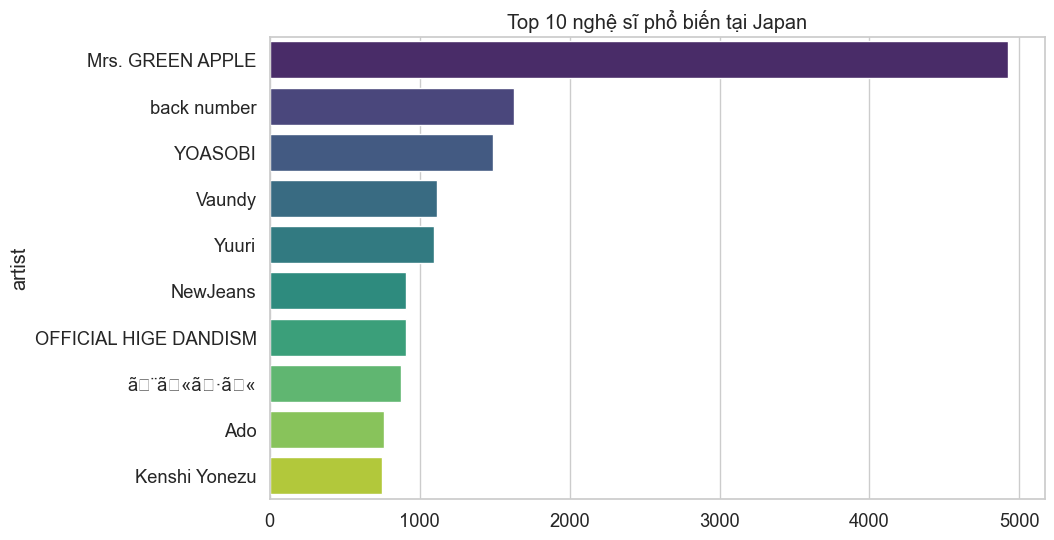

In [6]:
#top 10 nghệ sĩ xuất hiện nhiều nhất
top_artists = df['artist'].value_counts().head(10)
sns.barplot(y=top_artists.index, x=top_artists.values, palette="viridis")
plt.title("Top 10 nghệ sĩ phổ biến tại Japan")
plt.show()


C:\Users\nhutn\AppData\Local\Temp\ipykernel_3532\3672620135.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_genres, x='Count', y='Genre', palette="viridis")


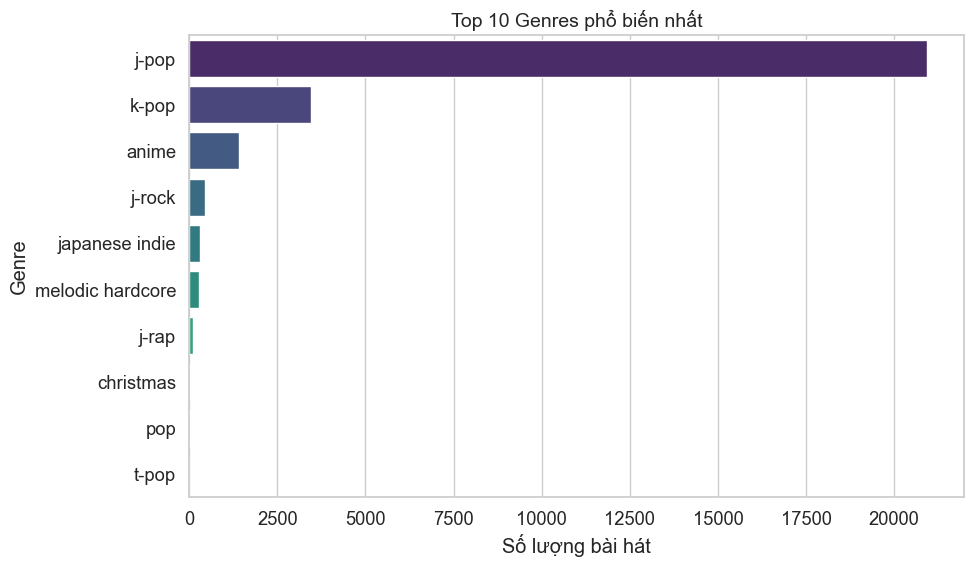

,Genre,Count
0,j-pop,20941
1,k-pop,3445
2,anime,1424
3,j-rock,438
4,japanese indie,297
5,melodic hardcore,267
6,j-rap,115
7,christmas,15
8,pop,9
9,t-pop,2


In [7]:
# Top 10 genres phổ biến nhất
# Bỏ giá trị unknown
df_genre = df[df['main_genre'] != "unknown"]

# Top 10 genres
top10_genres = (df_genre['main_genre']
                .value_counts()
                .head(10)
                .reset_index())
top10_genres.columns = ['Genre', 'Count']

plt.figure(figsize=(10,6))
sns.barplot(data=top10_genres, x='Count', y='Genre', palette="viridis")
plt.title("Top 10 Genres phổ biến nhất", fontsize=14)
plt.xlabel("Số lượng bài hát")
plt.ylabel("Genre")
plt.show()

top10_genres



C:\Users\nhutn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 130 (\x82) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nhutn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 131 (\x83) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nhutn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 137 (\x89) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


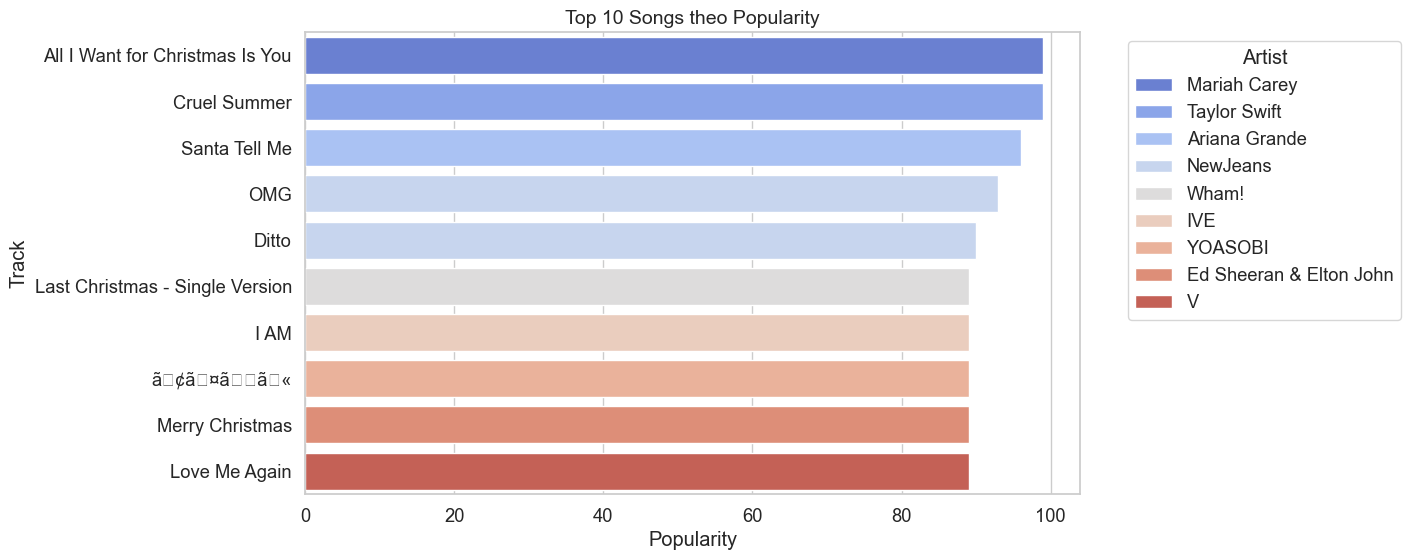

,track_id,song,artist,popularity
0,0bYg9bo50gSsH3LtXe2SQn,All I Want for Christmas Is You,Mariah Carey,99
1,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,Taylor Swift,99
2,0lizgQ7Qw35od7CYaoMBZb,Santa Tell Me,Ariana Grande,96
3,65FftemJ1DbbZ45DUfHJXE,OMG,NewJeans,93
4,3r8RuvgbX9s7ammBn07D3W,Ditto,NewJeans,90
5,06qMRF18gwbOYYbnP2du6i,Last Christmas - Single Version,Wham!,89
6,70t7Q6AYG6ZgTYmJWcnkUM,I AM,IVE,89
7,7ovUcF5uHTBRzUpB6ZOmvt,ã¢ã¤ãã«,YOASOBI,89
8,3bH2Eu9A9ymI4UnGHRmoXg,Merry Christmas,Ed Sheeran & Elton John,89
9,2N0SPREDYqILVEFSsWF5N5,Love Me Again,V,89


In [8]:
# Top 10 bài hát theo Popularity (unique theo track_id)
if 'popularity' in df.columns:
    metric = 'popularity'
else:
    metric = 'streams'

top10_songs = (df[['track_id','song', 'artist', metric]]
               .drop_duplicates(subset=['track_id'])   # loại trùng theo track_id
               .sort_values(by=metric, ascending=False)
               .head(10)
               .reset_index(drop=True))

plt.figure(figsize=(10,6))
sns.barplot(data=top10_songs, x=metric, y='song', hue='artist',
            dodge=False, palette="coolwarm")
plt.title(f"Top 10 Songs theo {metric.capitalize()}", fontsize=14)
plt.xlabel(metric.capitalize())
plt.ylabel("Track")
plt.legend(title="Artist", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

top10_songs



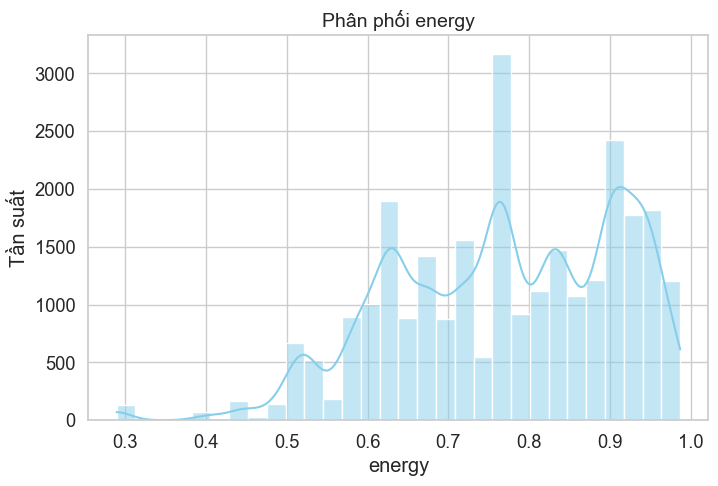

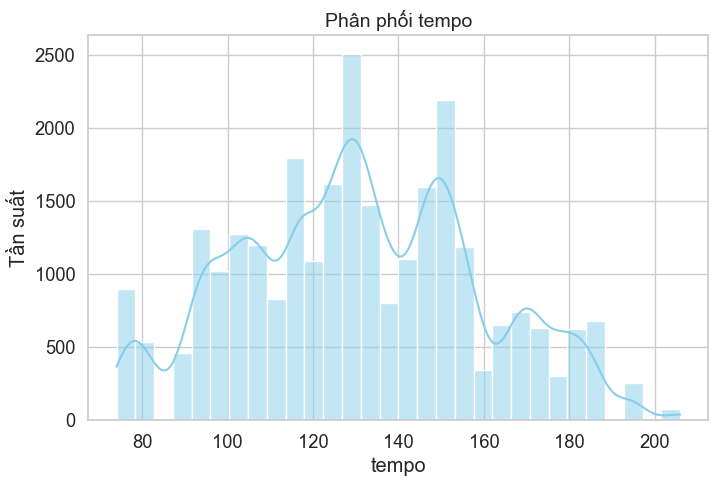

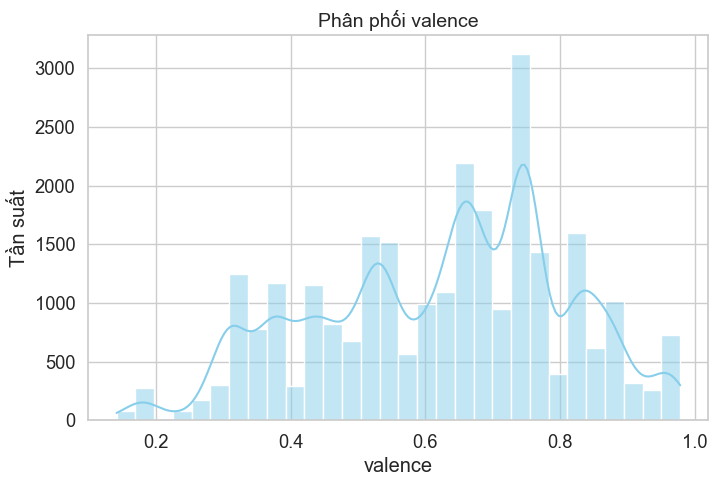

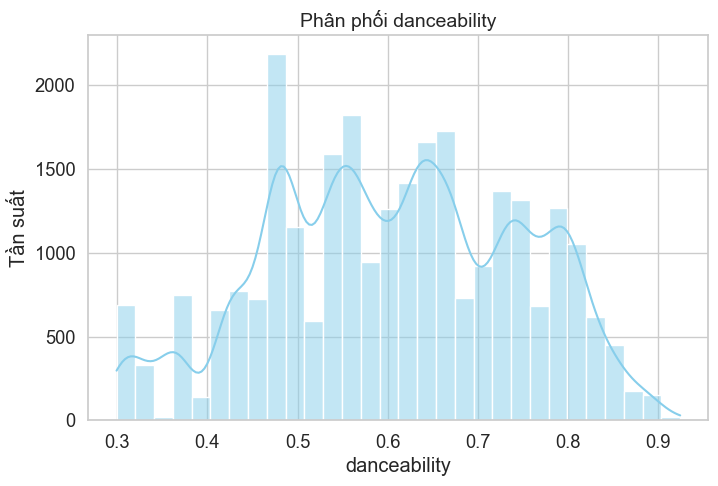

In [9]:
# Danh sách các đặc trưng muốn phân tích
features = ["energy", "tempo", "valence", "danceability"]

for f in features:
    plt.figure(figsize=(8,5))
    sns.histplot(df[f], kde=True, bins=30, color="skyblue")
    plt.title(f"Phân phối {f}", fontsize=14)
    plt.xlabel(f)
    plt.ylabel("Tần suất")
    plt.show()


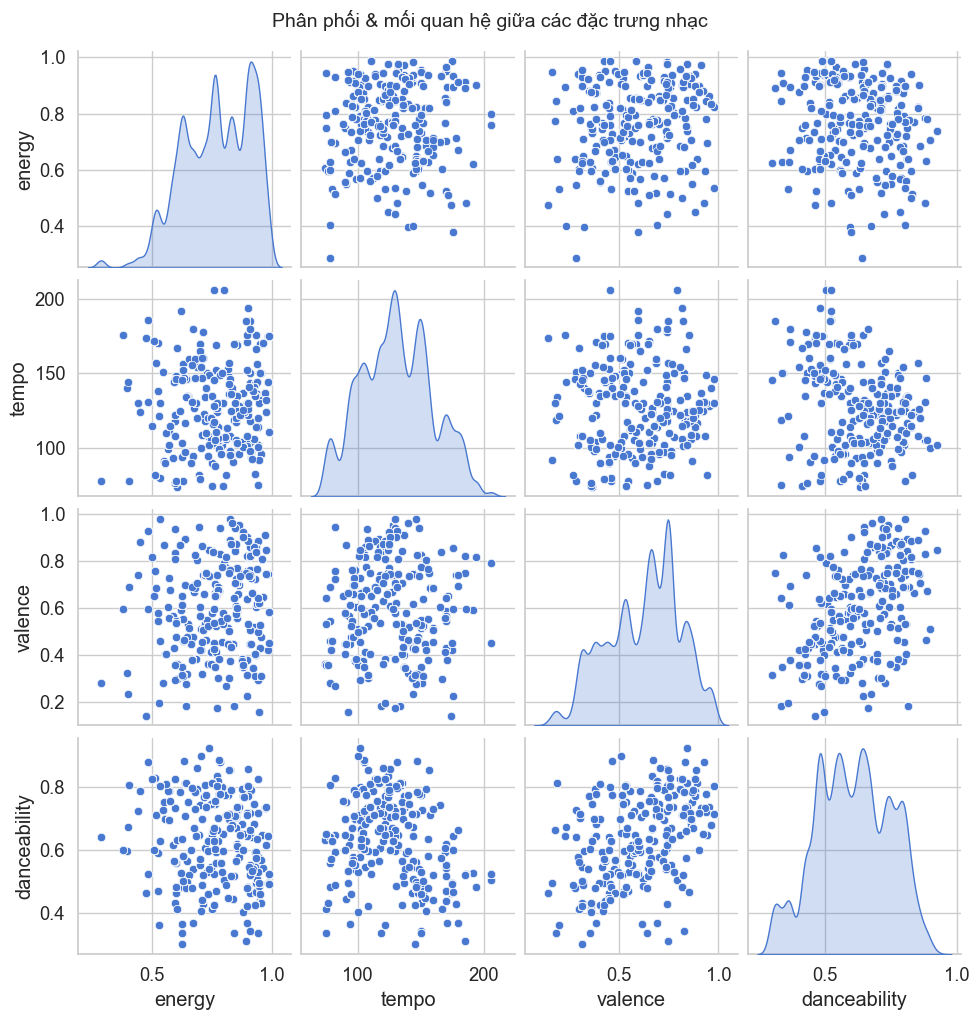

In [10]:
# Ma trận hiệp phương sai
sns.pairplot(df[["energy", "tempo", "valence", "danceability"]], diag_kind="kde")
plt.suptitle("Phân phối & mối quan hệ giữa các đặc trưng nhạc", y=1.02, fontsize=14)
plt.show()


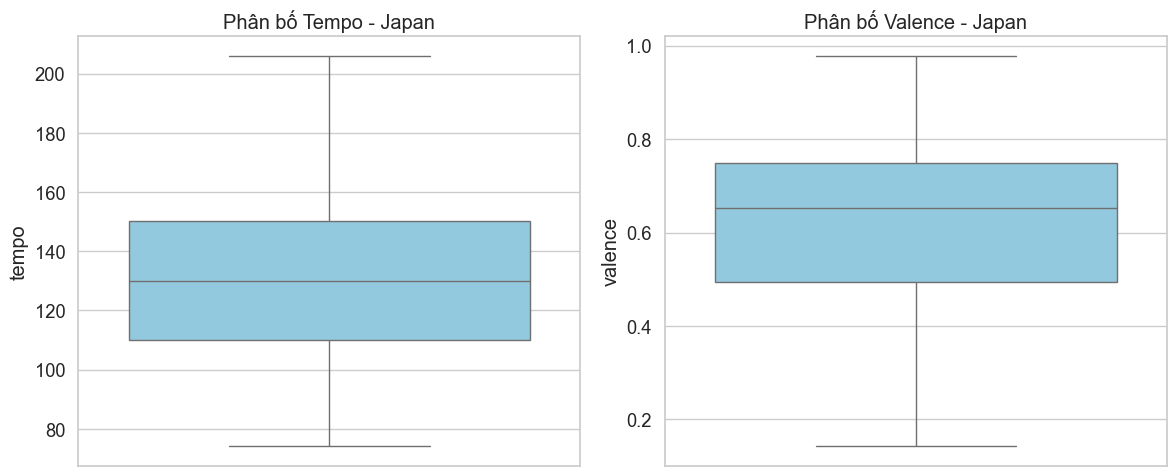

In [11]:
features = ["tempo", "valence"]

plt.figure(figsize=(12,5))
for i, col in enumerate(features, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Phân bố {col.capitalize()} - Japan")
plt.tight_layout()
plt.show()



In [ ]:
!pip install scikit-learn


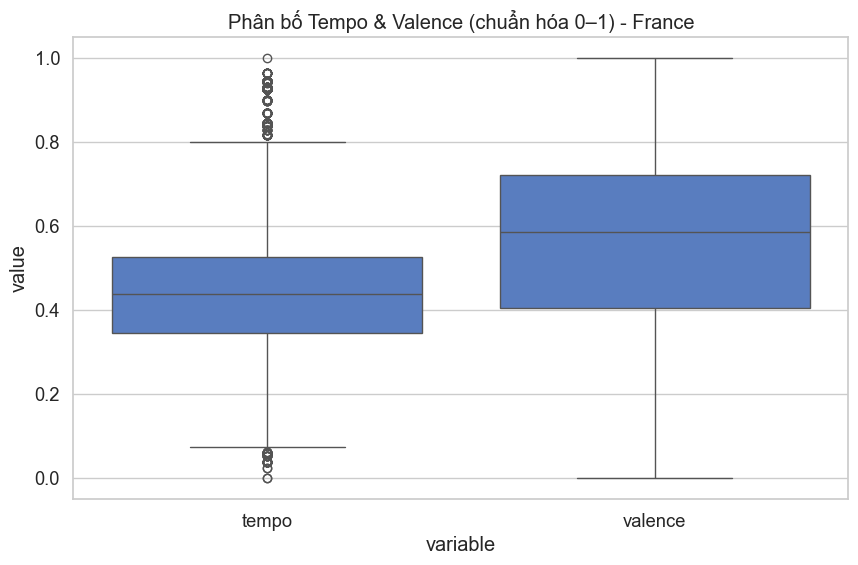

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[["tempo", "valence"]])
scaled_df = pd.DataFrame(scaled, columns=["tempo", "valence"])

sns.boxplot(x="variable", y="value", data=pd.melt(scaled_df))
plt.title("Phân bố Tempo & Valence (chuẩn hóa 0–1) - Japan")
plt.show()


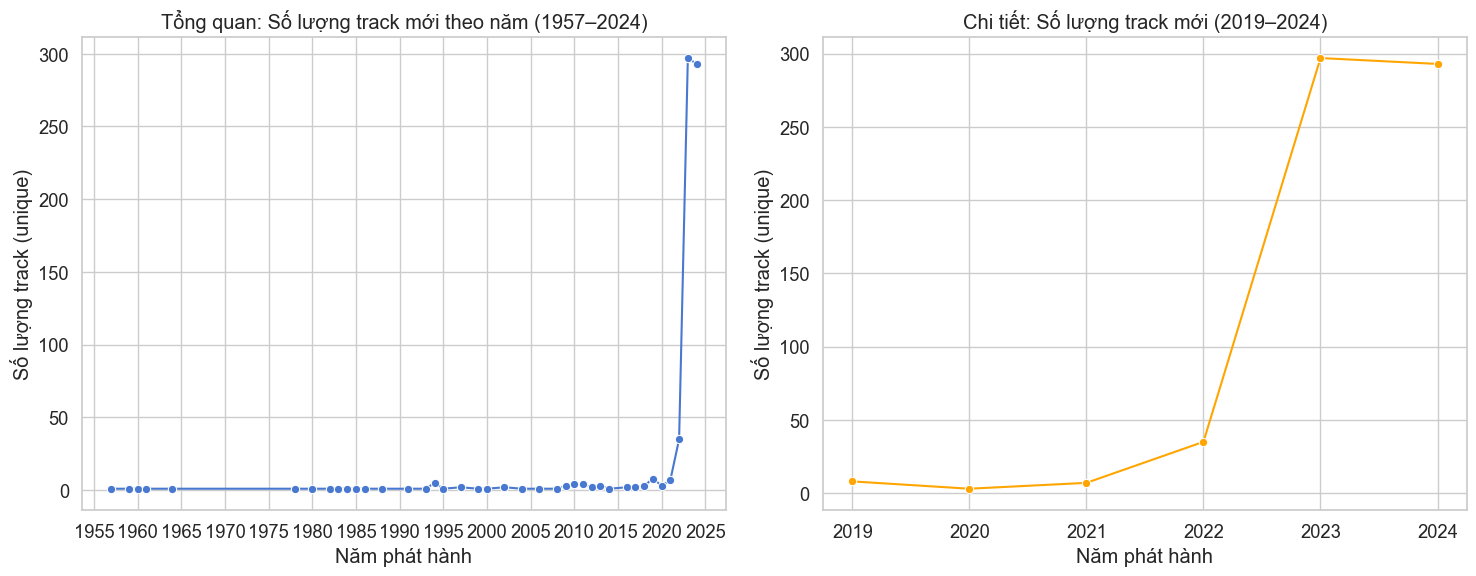

In [ ]:
# import matplotlib.ticker as mticker

# # --- Toàn bộ dữ liệu ---
# plt.figure(figsize=(15,6))

# # Subplot 1: Toàn bộ từ 1960
# plt.subplot(1,2,1)
# sns.lineplot(x=tracks_per_year.index, y=tracks_per_year.values, marker="o")
# plt.title("Tổng quan: Số lượng track mới theo năm (1960–2025)")
# plt.xlabel("Năm phát hành")
# plt.ylabel("Số lượng track (unique)")
# plt.grid(True)

# # Để tránh quá dày, hiển thị tick mỗi 5 năm
# plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))

# # Subplot 2: Chi tiết từ 2020
# tracks_recent = tracks_per_year[tracks_per_year.index >= 2020]

# plt.subplot(1,2,2)
# sns.lineplot(x=tracks_recent.index, y=tracks_recent.values, marker="o", color="orange")
# plt.title("Chi tiết: Số lượng track mới (2020–2025)")
# plt.xlabel("Năm phát hành")
# plt.ylabel("Số lượng track (unique)")
# plt.grid(True)

# # Hiển thị tất cả năm trong giai đoạn 2020–2025
# plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))

# plt.tight_layout()
# plt.show()
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# ============================
# 1. Chuẩn bị dữ liệu
# ============================

# Đảm bảo release_date là datetime
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")

# Lấy năm phát hành
df["release_year"] = df["release_date"].dt.year

# Đếm số track unique theo năm
tracks_per_year = df.groupby("release_year")["track_id"].nunique()

# ============================
# 2. Vẽ biểu đồ
# ============================

plt.figure(figsize=(15,6))

# Subplot 1: toàn bộ range
plt.subplot(1,2,1)
sns.lineplot(x=tracks_per_year.index, y=tracks_per_year.values, marker="o")
plt.title(f"Tổng quan: Số lượng track mới theo năm ({tracks_per_year.index.min()}–{tracks_per_year.index.max()})")
plt.xlabel("Năm phát hành")
plt.ylabel("Số lượng track (unique)")
plt.grid(True)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))

# Subplot 2: zoom vào 5 năm gần nhất
recent_years = tracks_per_year.index.max() - 5
tracks_recent = tracks_per_year[tracks_per_year.index >= recent_years]

plt.subplot(1,2,2)
sns.lineplot(x=tracks_recent.index, y=tracks_recent.values, marker="o", color="orange")
plt.title(f"Chi tiết: Số lượng track mới ({recent_years}–{tracks_per_year.index.max()})")
plt.xlabel("Năm phát hành")
plt.ylabel("Số lượng track (unique)")
plt.grid(True)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))

plt.tight_layout()
plt.show()


Tổng cộng dataset có 556 tuần BXH


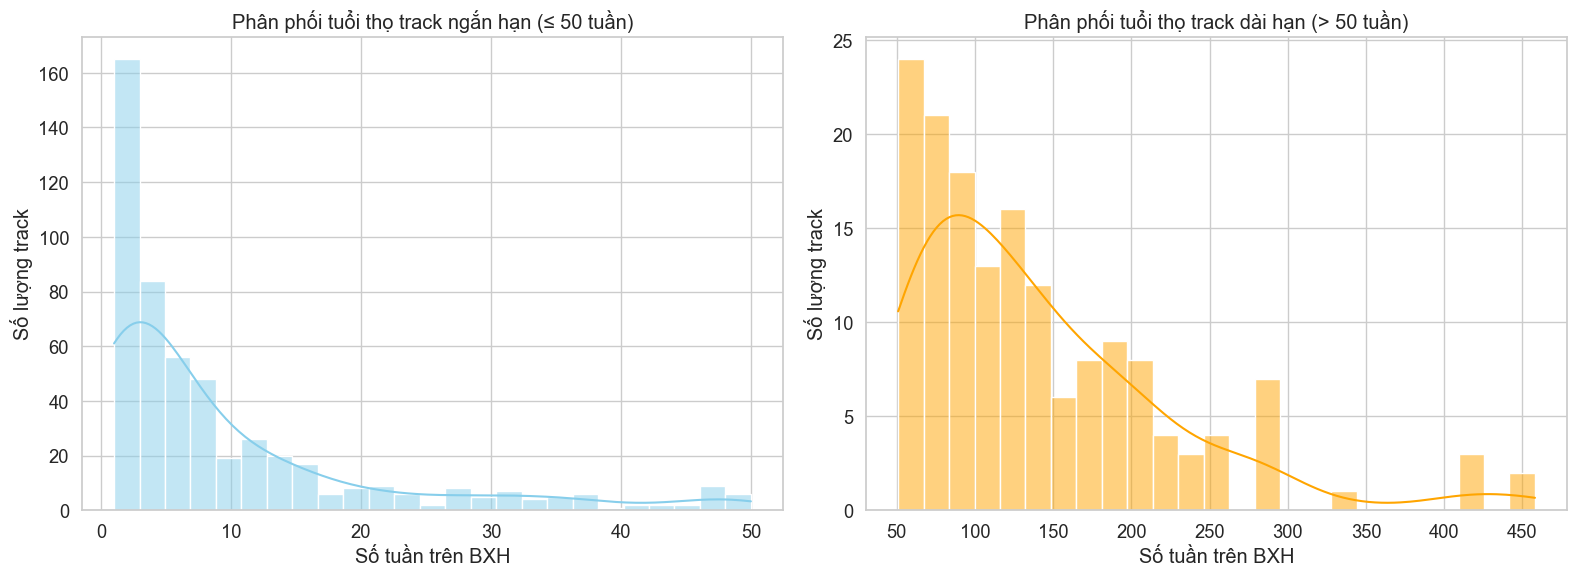

In [ ]:

# Đổi date sang datetime
df['date'] = pd.to_datetime(df['date'], errors="coerce")

# Tính số tuần mỗi track có mặt trên BXH
track_lifetime = df.groupby('track_id')['date'].nunique().reset_index()
track_lifetime.columns = ['track_id','weeks_on_chart']

# Tổng số tuần trong dataset
total_weeks = df['date'].nunique()
print(f"Tổng cộng dataset có {total_weeks} tuần BXH")

# Vẽ histogram short vs long term
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Track ngắn hạn (≤ 50 tuần)
sns.histplot(track_lifetime[track_lifetime['weeks_on_chart'] <= 50]['weeks_on_chart'], 
             bins=25, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Phân phối tuổi thọ track ngắn hạn (≤ 50 tuần)")
axes[0].set_xlabel("Số tuần trên BXH")
axes[0].set_ylabel("Số lượng track")

# Track dài hạn (> 50 tuần)
sns.histplot(track_lifetime[track_lifetime['weeks_on_chart'] > 50]['weeks_on_chart'], 
             bins=25, kde=True, ax=axes[1], color="orange")
axes[1].set_title("Phân phối tuổi thọ track dài hạn (> 50 tuần)")
axes[1].set_xlabel("Số tuần trên BXH")
axes[1].set_ylabel("Số lượng track")

plt.tight_layout()
plt.show()




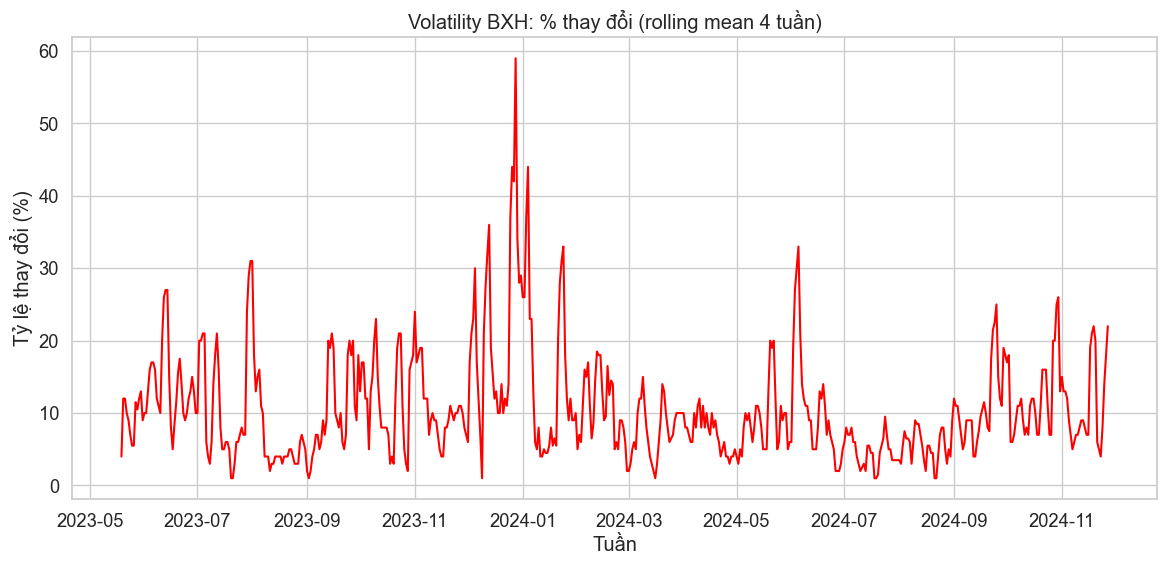

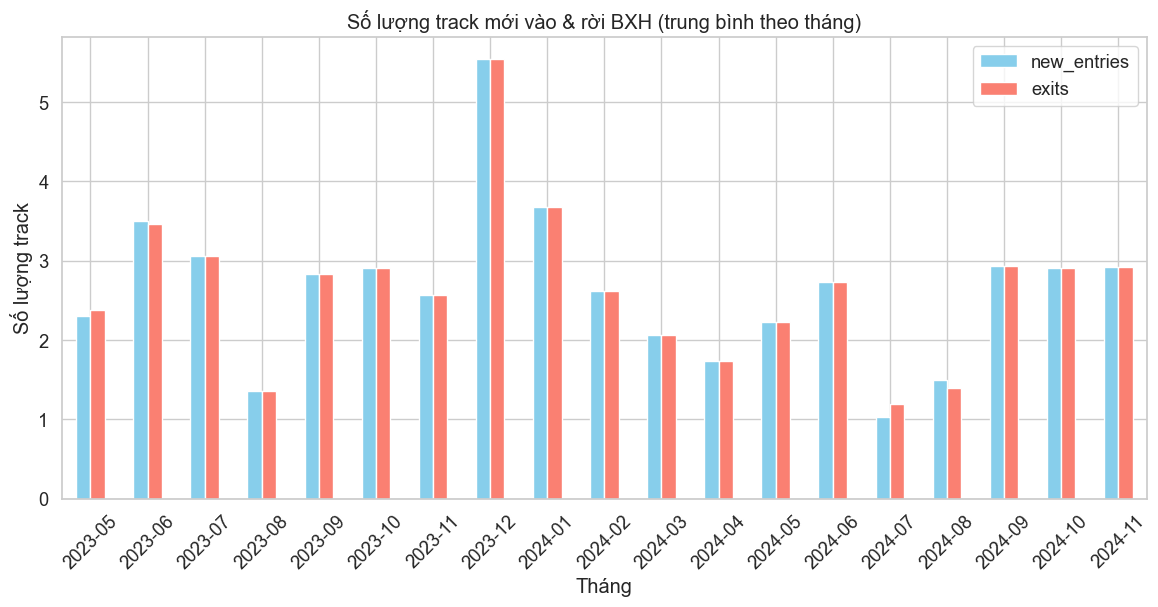

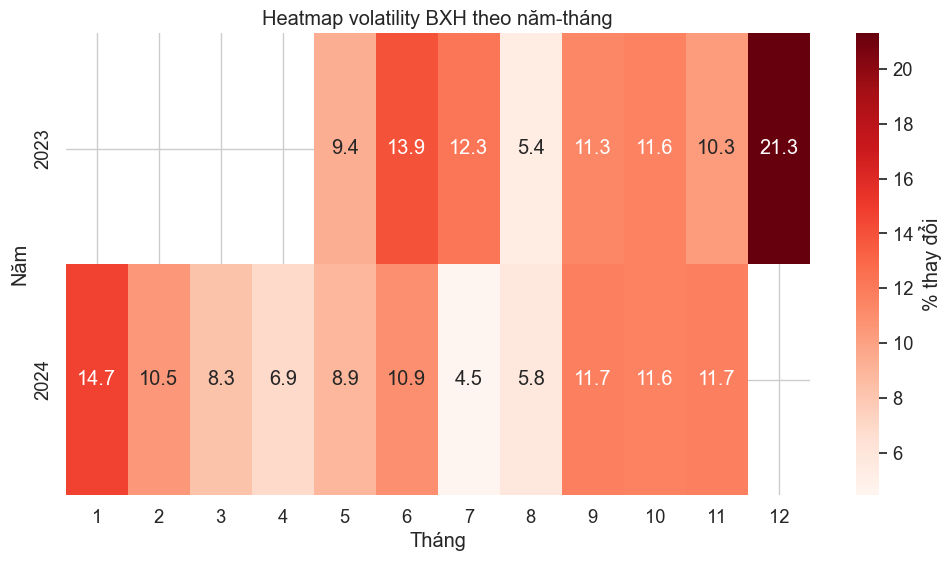

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chuẩn bị dữ liệu
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.sort_values(['date','position'])

weeks = sorted(df['date'].unique())
volatility_data = []

for i in range(1, len(weeks)):
    this_week = df[df['date'] == weeks[i]]['track_id'].unique()
    prev_week = df[df['date'] == weeks[i-1]]['track_id'].unique()
    
    new_entries = len(set(this_week) - set(prev_week))
    exits = len(set(prev_week) - set(this_week))
    volatility = (new_entries + exits) / 50 * 100
    
    volatility_data.append({
        'week': weeks[i],
        'new_entries': new_entries,
        'exits': exits,
        'volatility_pct': volatility
    })

vol_df = pd.DataFrame(volatility_data)

# Giới hạn volatility tối đa 100% để tránh outlier
vol_df['volatility_pct'] = vol_df['volatility_pct'].clip(upper=100)

# Rolling mean (4 tuần)
vol_df['volatility_roll'] = vol_df['volatility_pct'].rolling(window=4, min_periods=1).mean()

# ======================
# 1. Line chart volatility smoothed
# ======================
plt.figure(figsize=(14,6))
sns.lineplot(data=vol_df, x='week', y='volatility_roll', color="red")
plt.title("Volatility BXH: % thay đổi (rolling mean 4 tuần)")
plt.ylabel("Tỷ lệ thay đổi (%)")
plt.xlabel("Tuần")
plt.grid(True)
plt.show()

# ======================
# 2. Bar chart trung bình theo tháng
# ======================
vol_df['month'] = vol_df['week'].dt.to_period("M")
monthly_vol = vol_df.groupby('month')[['new_entries','exits']].mean()

monthly_vol.plot(kind='bar', figsize=(14,6), color=["skyblue","salmon"])
plt.title("Số lượng track mới vào & rời BXH (trung bình theo tháng)")
plt.ylabel("Số lượng track")
plt.xlabel("Tháng")
plt.xticks(rotation=45)
plt.show()

# ======================
# 3. Heatmap volatility theo năm-tháng
# ======================
vol_df['year'] = vol_df['week'].dt.year
vol_df['month_num'] = vol_df['week'].dt.month

heatmap_data = vol_df.groupby(['year','month_num'])['volatility_pct'].mean().unstack()

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="Reds", cbar_kws={'label': '% thay đổi'})
plt.title("Heatmap volatility BXH theo năm-tháng")
plt.ylabel("Năm")
plt.xlabel("Tháng")
plt.show()



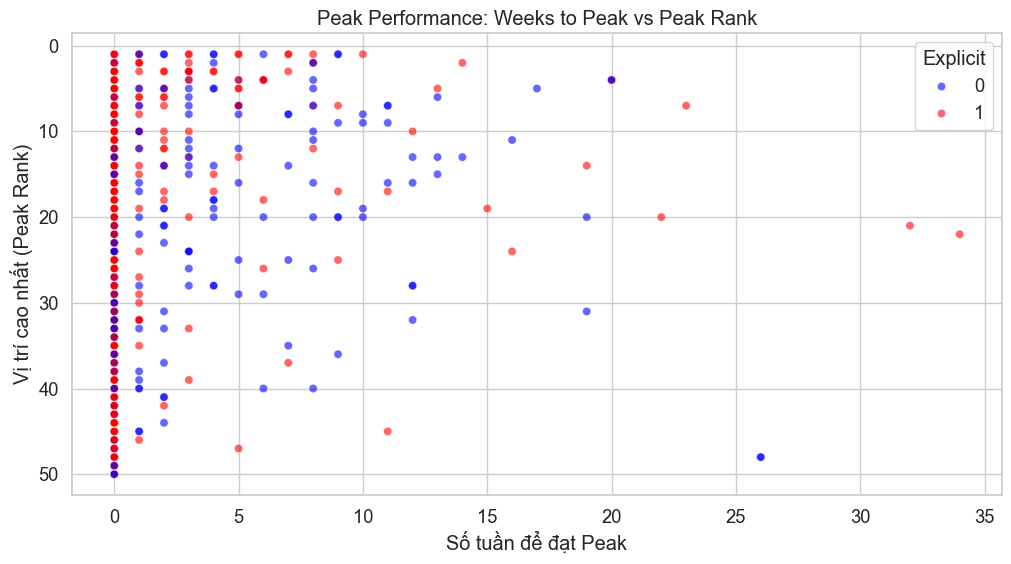

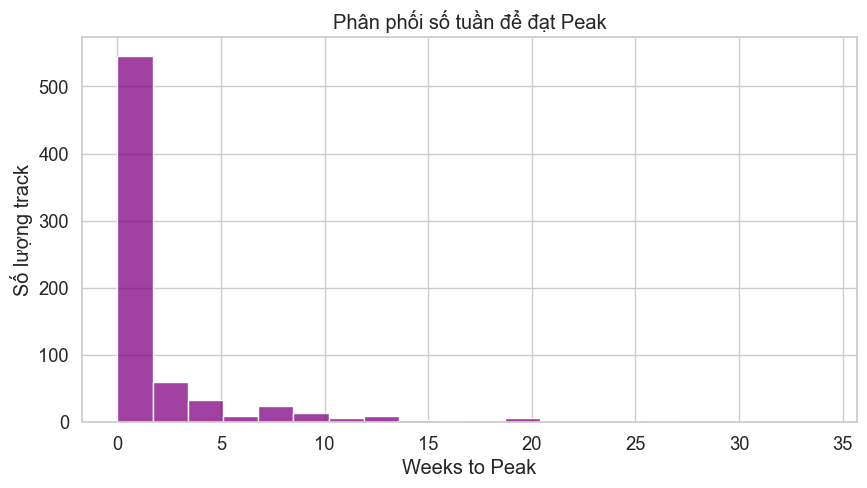

In [ ]:
# Peak performance per track
track_perf = df.groupby('track_id').agg(
    week_first=('date','min'),
    week_peak=('date', lambda x: df.loc[x.index, 'position'].idxmin())
).reset_index()

# Lấy peak rank
peak_rank = df.groupby('track_id')['position'].min().reset_index()
peak_rank.columns = ['track_id','peak_rank']

# Merge vào
track_perf = track_perf.merge(peak_rank, on='track_id')

# Tính số tuần để đạt peak
track_perf['week_first'] = pd.to_datetime(track_perf['week_first'])
track_perf['week_peak'] = df.loc[track_perf['week_peak'],'date'].values
track_perf['week_peak'] = pd.to_datetime(track_perf['week_peak'])
track_perf['weeks_to_peak'] = ((track_perf['week_peak'] - track_perf['week_first']).dt.days / 7).astype(int)

# Merge thêm tên bài và explicit
meta = df[['track_id','song','artist','is_explicit']].drop_duplicates()
track_perf = track_perf.merge(meta, on='track_id', how='left')

# --- Visualization ---
plt.figure(figsize=(12,6))
sns.scatterplot(data=track_perf, x='weeks_to_peak', y='peak_rank',
                hue='is_explicit', palette={0:"blue",1:"red"}, alpha=0.6)

plt.gca().invert_yaxis()  # rank 1 ở trên
plt.title("Peak Performance: Weeks to Peak vs Peak Rank")
plt.xlabel("Số tuần để đạt Peak")
plt.ylabel("Vị trí cao nhất (Peak Rank)")
plt.legend(title="Explicit")
plt.grid(True)
plt.show()

# Histogram phân phối weeks_to_peak
plt.figure(figsize=(10,5))
sns.histplot(track_perf['weeks_to_peak'], bins=20, kde=False, color="purple")
plt.title("Phân phối số tuần để đạt Peak")
plt.xlabel("Weeks to Peak")
plt.ylabel("Số lượng track")
plt.show()


Top 5 track trụ lâu nhất trên BXH:
                 track_id             song                      artist  \
0  7wOgZ1otoKYDvKyQKP1sNZ      Laboratoire                     Werenoi   
1  7wOgZ1otoKYDvKyQKP1sNZ      Laboratoire                     Werenoi   
2  0EzNyXyU7gHzj2TN8qYThj  Bolide allemand                         SDM   
3  2PWJx5FwMrMVEaTjwYait1        Flashback                FavÃ© & Gazo   
4  2PWJx5FwMrMVEaTjwYait1        FLASHBACK                       FavÃ©   
5  30D9x5LFgL2o9xidjX2wtE         Casanova             Soolking & Gazo   
6  1eldTykrnkEBLX41bk5eMw     Petit gÃ©nie  Jungeli & Imen Es & Alonzo   
7  1eldTykrnkEBLX41bk5eMw     Petit gÃ©nie                     Jungeli   

   main_genre  weeks_on_chart release_date  
0  french rap             458   2023-03-10  
1  french rap             458   2023-03-09  
2  french rap             454   2022-12-02  
3  french rap             423   2023-09-15  
4  french rap             423   2023-10-13  
5  french rap             41

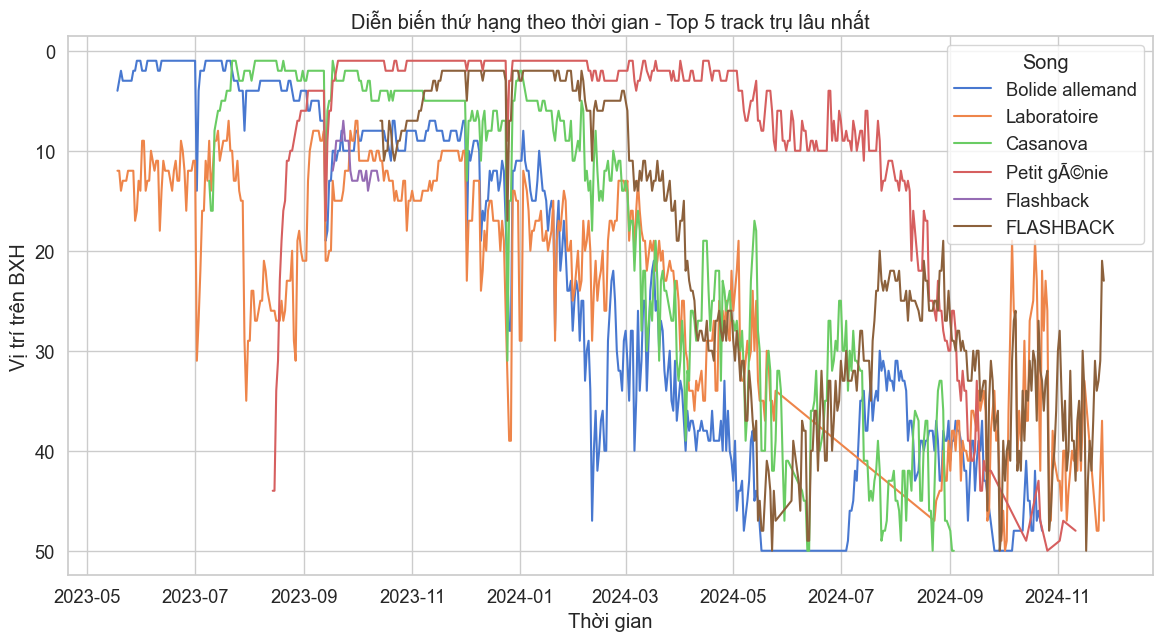

In [ ]:
# Số tuần mỗi track tồn tại
track_lifetime = df.groupby('track_id')['date'].nunique().reset_index()
track_lifetime.columns = ['track_id', 'weeks_on_chart']

# Merge lại để lấy thêm thông tin bài hát
df_top5 = track_lifetime.sort_values(by='weeks_on_chart', ascending=False).head(5)
df_top5 = df_top5.merge(df[['track_id','song','artist','main_genre', 'release_date']].drop_duplicates(),
                        on='track_id', how='left')

print("Top 5 track trụ lâu nhất trên BXH:")
print(df_top5[['track_id','song','artist','main_genre','weeks_on_chart', 'release_date']])

plt.figure(figsize=(14,7))

# Lọc dữ liệu chỉ gồm top 5
df_top5_tracks = df[df['track_id'].isin(df_top5['track_id'])]

# Vẽ line chart
sns.lineplot(data=df_top5_tracks, x='date', y='position', hue='song')

# Đảo ngược trục Y vì hạng 1 là top
plt.gca().invert_yaxis()

plt.title("Diễn biến thứ hạng theo thời gian - Top 5 track trụ lâu nhất")
plt.xlabel("Thời gian")
plt.ylabel("Vị trí trên BXH")
plt.legend(title="Song")
plt.show()


C:\Users\nhutn\AppData\Local\Temp\ipykernel_18588\3135989211.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_tracks, x='n_tracks', y='artist', palette="Blues_r")


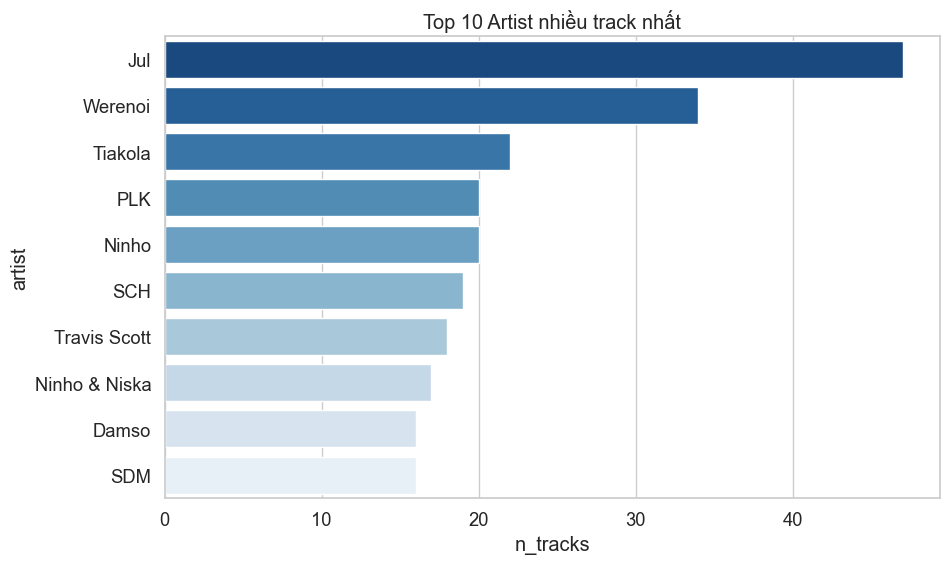

C:\Users\nhutn\AppData\Local\Temp\ipykernel_18588\3135989211.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_weeks, x='total_weeks', y='artist', palette="Greens_r")


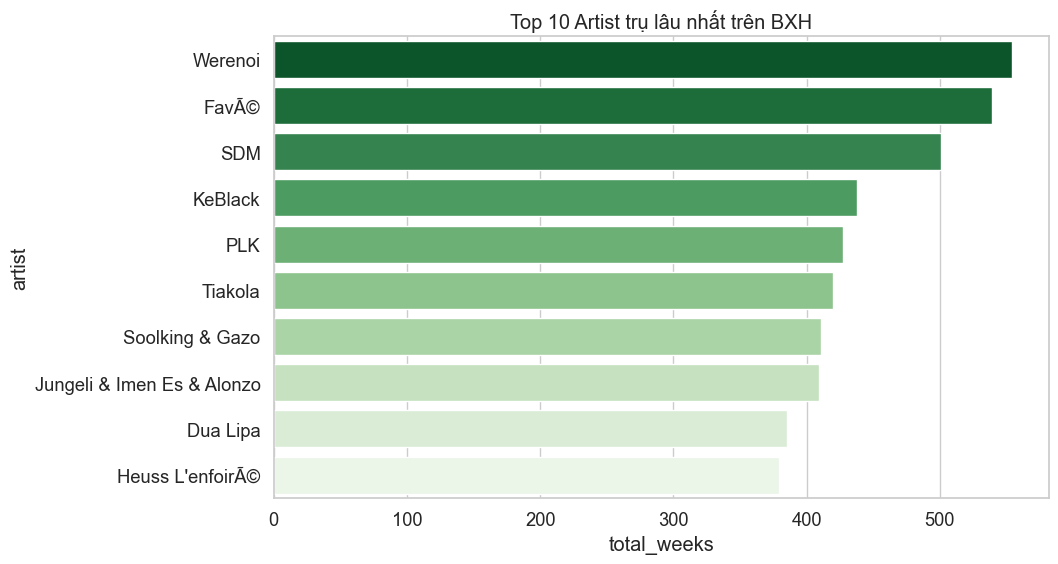

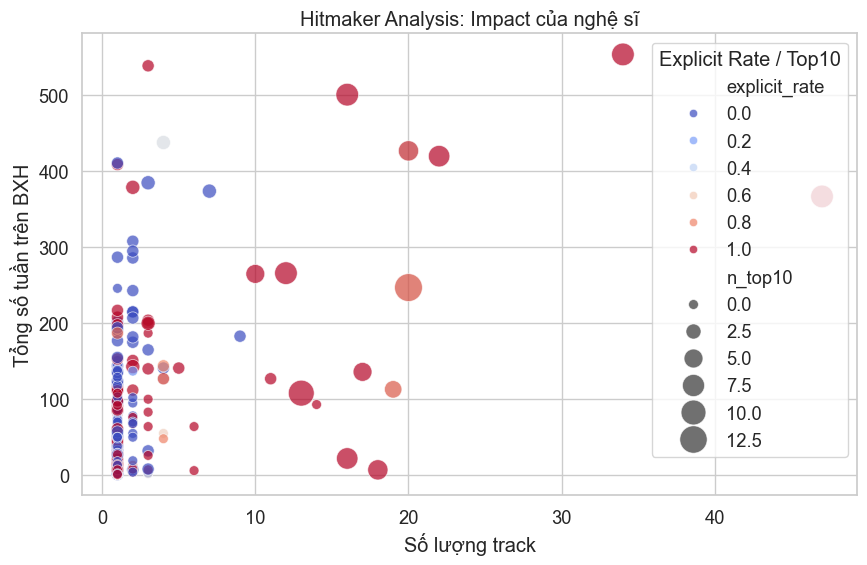

In [ ]:
# Chuẩn hóa tên nghệ sĩ (nếu collab nhiều, có thể tách ra nhưng ở đây để nguyên)
artist_stats = df.groupby('artist').agg(
    n_tracks=('track_id','nunique'),
    total_weeks=('date','nunique'),
    best_rank=('position','min'),
    avg_rank=('position','mean'),
    explicit_rate=('is_explicit','mean')
).reset_index()

# Thêm số track vào top10
artist_top10 = df[df['position']<=10].groupby('artist')['track_id'].nunique().reset_index()
artist_top10.columns = ['artist','n_top10']
artist_stats = artist_stats.merge(artist_top10, on='artist', how='left').fillna(0)

# Bar chart top 10 artist nhiều track
top_tracks = artist_stats.sort_values('n_tracks', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_tracks, x='n_tracks', y='artist', palette="Blues_r")
plt.title("Top 10 Artist nhiều track nhất")
plt.show()

# Bar chart top 10 artist trụ lâu nhất
top_weeks = artist_stats.sort_values('total_weeks', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_weeks, x='total_weeks', y='artist', palette="Greens_r")
plt.title("Top 10 Artist trụ lâu nhất trên BXH")
plt.show()

# Bubble chart: n_tracks vs total_weeks
plt.figure(figsize=(10,6))
sns.scatterplot(data=artist_stats, 
                x='n_tracks', y='total_weeks', 
                size='n_top10', sizes=(50,400), 
                hue='explicit_rate', palette="coolwarm", alpha=0.7)
plt.title("Hitmaker Analysis: Impact của nghệ sĩ")
plt.xlabel("Số lượng track")
plt.ylabel("Tổng số tuần trên BXH")
plt.legend(title="Explicit Rate / Top10")
plt.show()


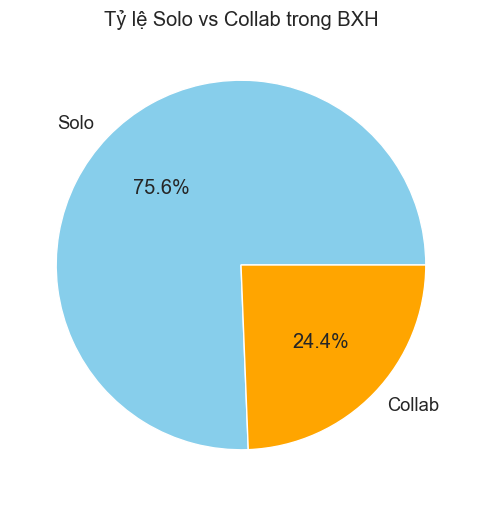

C:\Users\nhutn\AppData\Local\Temp\ipykernel_18588\3440137398.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=track_stats, x='is_collab', y='weeks_on_chart', palette="Set2")


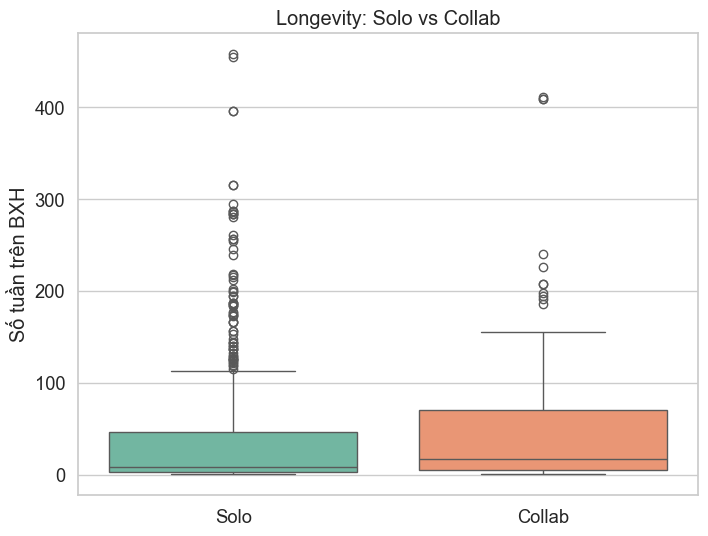

C:\Users\nhutn\AppData\Local\Temp\ipykernel_18588\3440137398.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=track_stats, x='is_collab', y='peak_rank', palette="Set3")


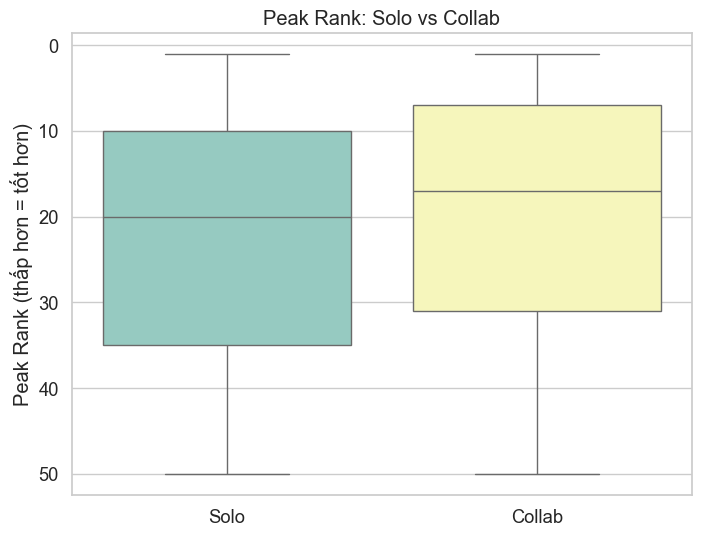

Tuổi thọ trung bình (weeks):
is_collab
0    39.341709
1    49.345455
Name: weeks_on_chart, dtype: float64

Hạng cao nhất trung bình:
is_collab
0    22.351759
1    19.733333
Name: peak_rank, dtype: float64


In [ ]:
# 1. Tạo cột is_collab
def detect_collab(artist):
    artist = str(artist).lower()
    if ("feat" in artist) or ("&" in artist) or ("," in artist):
        return 1
    return 0

df['is_collab'] = df['artist'].apply(detect_collab)

# 2. Longevity mỗi track
track_stats = df.groupby(['track_id','is_collab']).agg(
    weeks_on_chart=('date','nunique'),
    peak_rank=('position','min')
).reset_index()

# Merge thêm tên bài + explicit
meta = df[['track_id','song','artist','is_explicit']].drop_duplicates()
track_stats = track_stats.merge(meta, on='track_id', how='left')

# ======================
# Pie chart tỷ lệ collab vs solo
# ======================
collab_counts = df['is_collab'].value_counts(normalize=True) * 100
plt.figure(figsize=(6,6))
plt.pie(collab_counts, labels=['Solo','Collab'], autopct='%1.1f%%', colors=["skyblue","orange"])
plt.title("Tỷ lệ Solo vs Collab trong BXH")
plt.show()

# ======================
# Boxplot longevity
# ======================
plt.figure(figsize=(8,6))
sns.boxplot(data=track_stats, x='is_collab', y='weeks_on_chart', palette="Set2")
plt.xticks([0,1], ['Solo','Collab'])
plt.title("Longevity: Solo vs Collab")
plt.xlabel("")
plt.ylabel("Số tuần trên BXH")
plt.show()

# ======================
# Boxplot peak rank
# ======================
plt.figure(figsize=(8,6))
sns.boxplot(data=track_stats, x='is_collab', y='peak_rank', palette="Set3")
plt.xticks([0,1], ['Solo','Collab'])
plt.gca().invert_yaxis()  # vì rank 1 là top nhất
plt.title("Peak Rank: Solo vs Collab")
plt.xlabel("")
plt.ylabel("Peak Rank (thấp hơn = tốt hơn)")
plt.show()

# ======================
# Tính trung bình
# ======================
print("Tuổi thọ trung bình (weeks):")
print(track_stats.groupby('is_collab')['weeks_on_chart'].mean())

print("\nHạng cao nhất trung bình:")
print(track_stats.groupby('is_collab')['peak_rank'].mean())


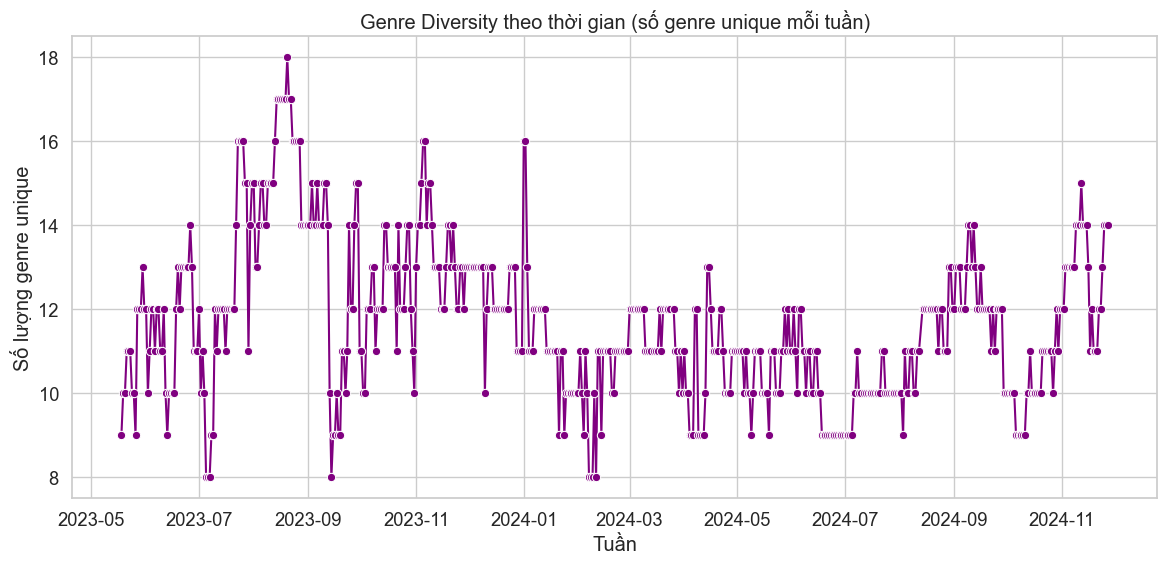

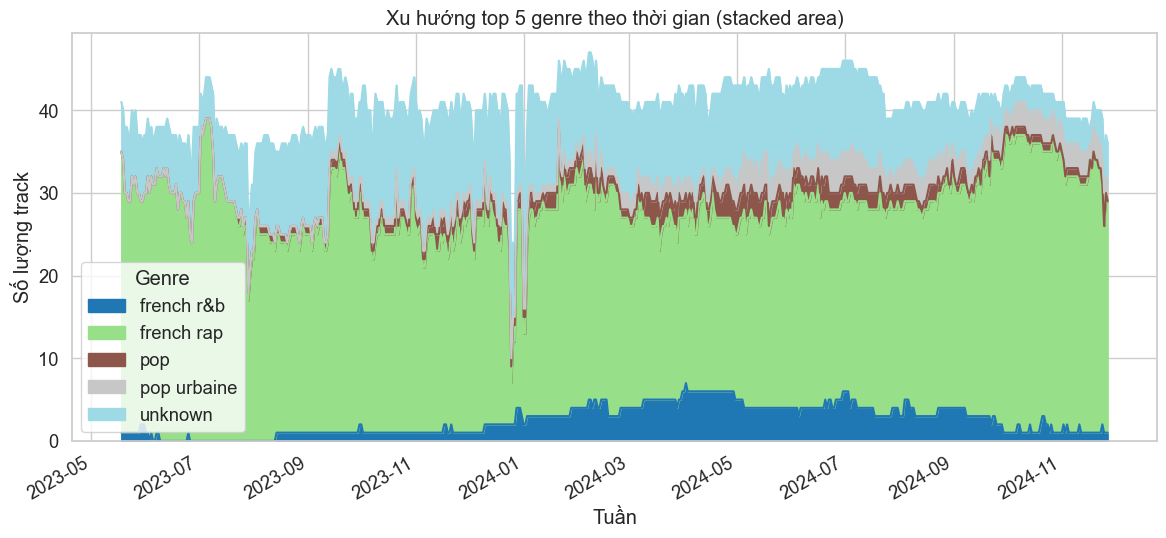

In [ ]:
# 1. Genre diversity (số genre unique mỗi tuần)
genre_diversity = df.groupby('date')['main_genre'].nunique().reset_index()
genre_diversity.columns = ['date','n_genres']

plt.figure(figsize=(14,6))
sns.lineplot(data=genre_diversity, x='date', y='n_genres', marker="o", color="purple")
plt.title("Genre Diversity theo thời gian (số genre unique mỗi tuần)")
plt.xlabel("Tuần")
plt.ylabel("Số lượng genre unique")
plt.grid(True)
plt.show()

# 2. Stacked area chart cho top genre
# Lấy top 5 genre phổ biến nhất toàn bộ BXH
top_genres = df['main_genre'].value_counts().head(5).index
df_top_genres = df[df['main_genre'].isin(top_genres)]

genre_trend = df_top_genres.groupby(['date','main_genre'])['track_id'].nunique().unstack().fillna(0)

genre_trend.plot(kind='area', stacked=True, figsize=(14,6), cmap="tab20")
plt.title("Xu hướng top 5 genre theo thời gian (stacked area)")
plt.xlabel("Tuần")
plt.ylabel("Số lượng track")
plt.legend(title="Genre")
plt.show()


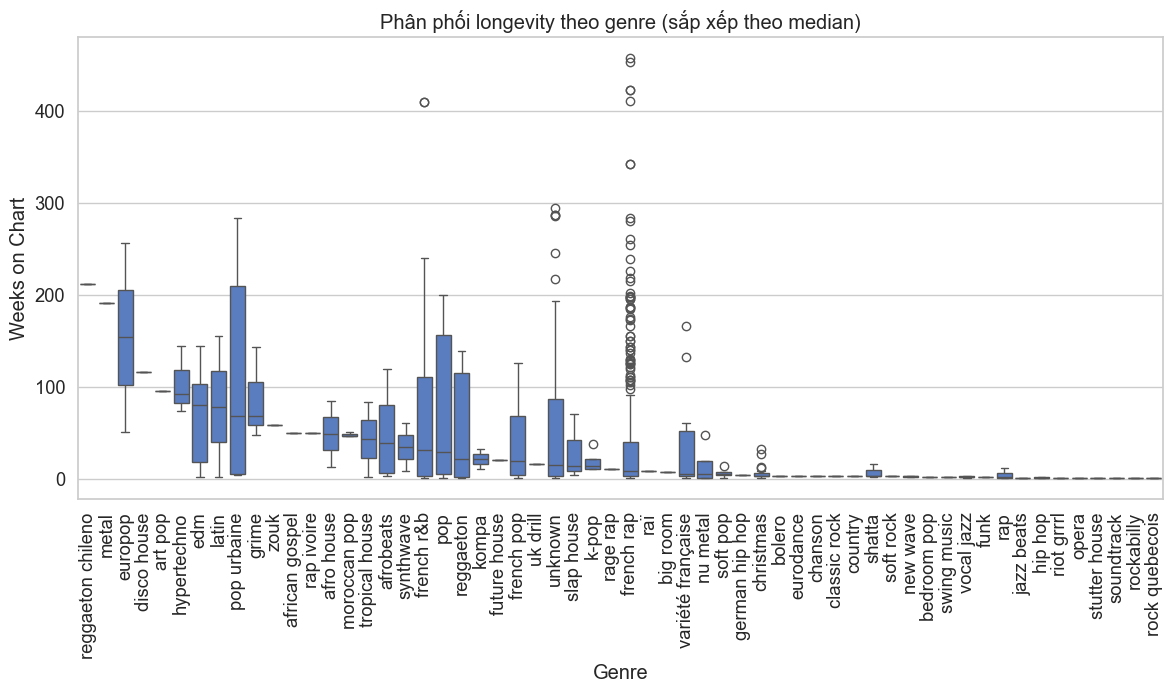

In [ ]:
# Tính số tuần mỗi track xuất hiện
track_lifetime = df.groupby('track_id')['date'].nunique().reset_index()
track_lifetime.columns = ['track_id','weeks_on_chart']

# Lấy thông tin genre
track_genre = df[['track_id','song','artist','main_genre']].drop_duplicates()

# Merge vào để có bảng longevity
df_longevity = track_lifetime.merge(track_genre, on='track_id', how='left')

# Tính median longevity theo genre để sắp xếp
order = df_longevity.groupby("main_genre")["weeks_on_chart"].median().sort_values(ascending=False).index

plt.figure(figsize=(14,6))
sns.boxplot(data=df_longevity, x="main_genre", y="weeks_on_chart", order=order)
plt.xticks(rotation=90)
plt.title("Phân phối longevity theo genre (sắp xếp theo median)")
plt.xlabel("Genre")
plt.ylabel("Weeks on Chart")
plt.show()



C:\Users\nhutn\AppData\Local\Temp\ipykernel_18588\1321444885.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_longevity[df_longevity['main_genre'].isin(top10_genres)],


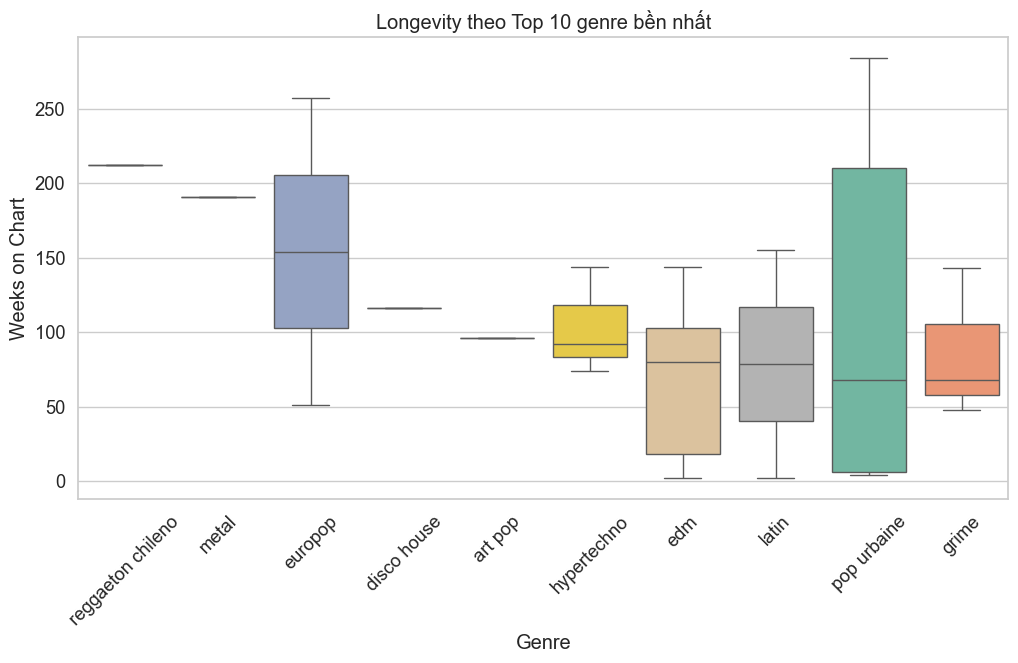

In [ ]:
top10_genres = order[:10]

plt.figure(figsize=(12,6))
sns.boxplot(data=df_longevity[df_longevity['main_genre'].isin(top10_genres)], 
            x="main_genre", y="weeks_on_chart", order=top10_genres, palette="Set2")
plt.xticks(rotation=45)
plt.title("Longevity theo Top 10 genre bền nhất")
plt.xlabel("Genre")
plt.ylabel("Weeks on Chart")
plt.show()


C:\Users\nhutn\AppData\Local\Temp\ipykernel_18588\116059803.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_longevity, x="main_genre", y="weeks_on_chart", order=order, palette="Set3")


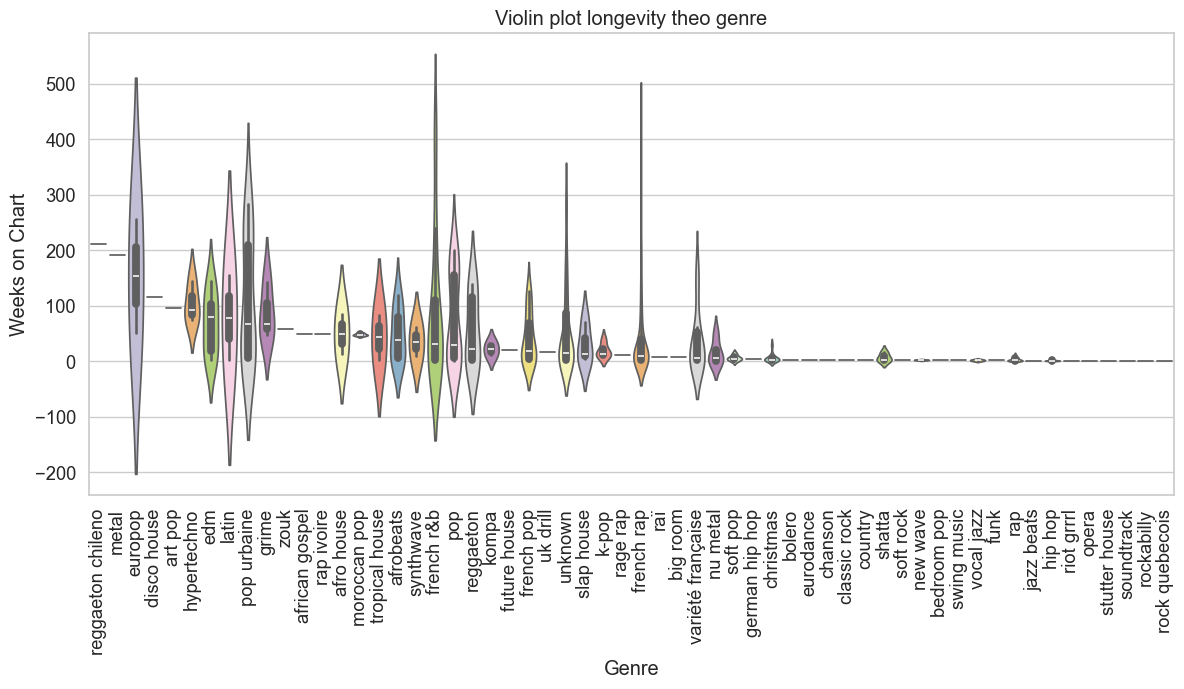

In [ ]:
plt.figure(figsize=(14,6))
sns.violinplot(data=df_longevity, x="main_genre", y="weeks_on_chart", order=order, palette="Set3")
plt.xticks(rotation=90)
plt.title("Violin plot longevity theo genre")
plt.xlabel("Genre")
plt.ylabel("Weeks on Chart")
plt.show()


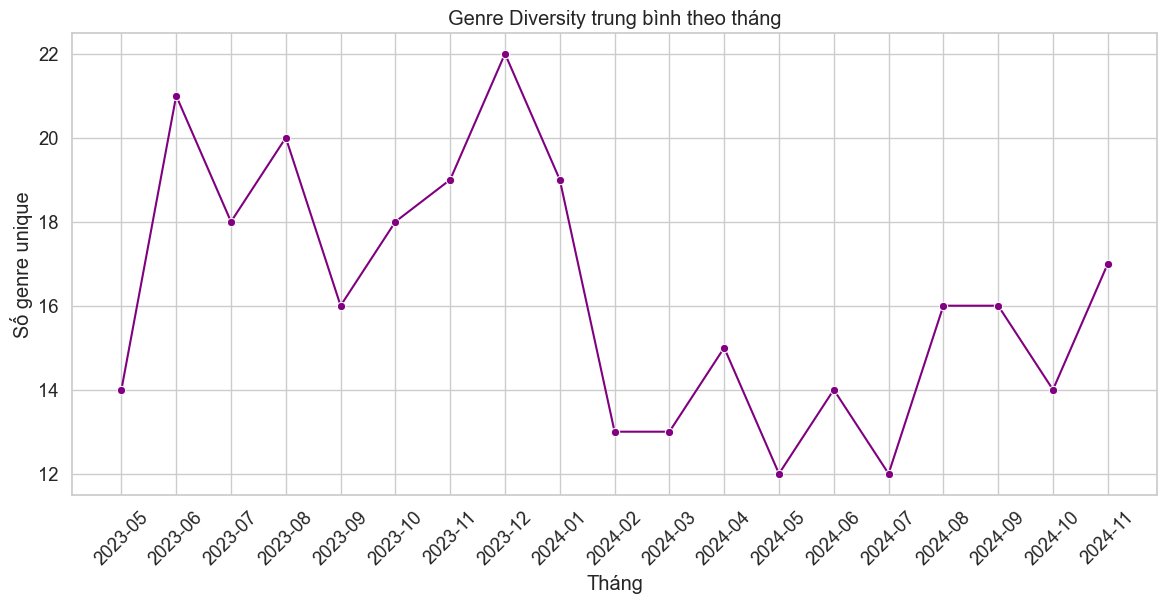

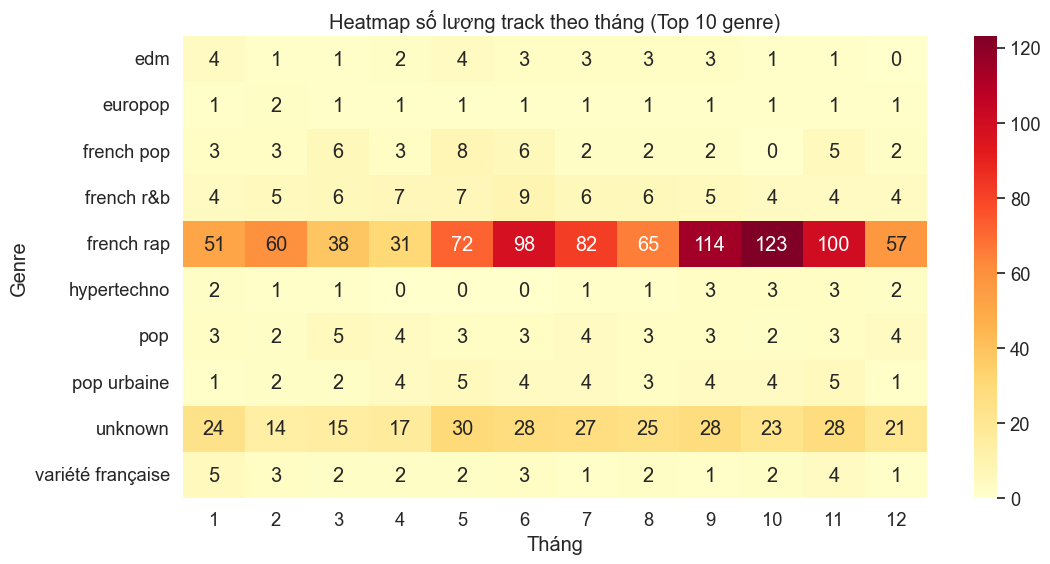

C:\Users\nhutn\AppData\Local\Temp\ipykernel_18588\2269362966.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=season_div, x='season', y='main_genre', palette="Set2")


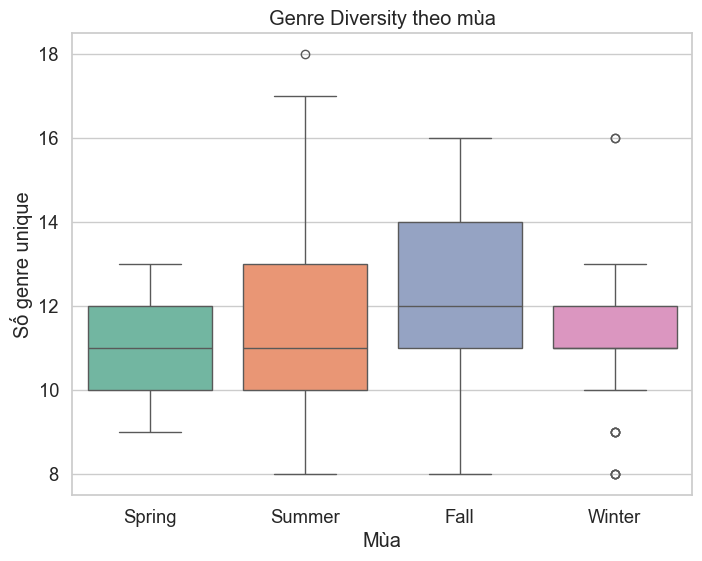

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đảm bảo cột date dạng datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Mapping tháng -> mùa
def month_to_season(month):
    if month in [12,1,2]:
        return "Winter"
    elif month in [3,4,5]:
        return "Spring"
    elif month in [6,7,8]:
        return "Summer"
    else:
        return "Fall"

df['season'] = df['month'].apply(month_to_season)

# ======================
# 1. Genre diversity theo tháng
# ======================
genre_month = df.groupby(['year','month'])['main_genre'].nunique().reset_index()
genre_month['year_month'] = genre_month['year'].astype(str) + "-" + genre_month['month'].astype(str).str.zfill(2)

plt.figure(figsize=(14,6))
sns.lineplot(data=genre_month, x='year_month', y='main_genre', marker="o", color="purple")
plt.xticks(rotation=45)
plt.title("Genre Diversity trung bình theo tháng")
plt.ylabel("Số genre unique")
plt.xlabel("Tháng")
plt.grid(True)
plt.show()

# ======================
# 2. Heatmap genre theo tháng (Top 10 genre)
# ======================
top_genres = df['main_genre'].value_counts().head(10).index
df_top = df[df['main_genre'].isin(top_genres)]

genre_heatmap = df_top.groupby(['month','main_genre'])['track_id'].nunique().unstack().fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(genre_heatmap.T, cmap="YlOrRd", annot=True, fmt=".0f")
plt.title("Heatmap số lượng track theo tháng (Top 10 genre)")
plt.xlabel("Tháng")
plt.ylabel("Genre")
plt.show()

# ======================
# 3. Boxplot Genre Diversity theo mùa
# ======================
season_div = df.groupby(['date','season'])['main_genre'].nunique().reset_index()

plt.figure(figsize=(8,6))
sns.boxplot(data=season_div, x='season', y='main_genre', palette="Set2")
plt.title("Genre Diversity theo mùa")
plt.xlabel("Mùa")
plt.ylabel("Số genre unique")
plt.show()


Các bài hát outlier theo audio features:


,track_id,song,artist,main_genre,danceability,feature,energy,valence,tempo,loudness,acousticness,speechiness,liveness
1222,6KhgJkLrKKfx9Il92686Bx,MazÃ©,Jul,opera,0.291,danceability,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3637,2Q0aElTZQtEUsoiaQfizu6,PARASAIL,Travis Scott,rap,0.361,danceability,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3842,6wf7Yu7cxBSPrRlWeSeK0Q,What Was I Made For? [From The Motion Picture ...,Billie Eilish,unknown,0.391,danceability,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4047,0brTq66ZftMGbr6OfKFUM9,Ha ha ha,Jul,riot grrrl,0.306,danceability,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7124,3eP13S8D5m2cweMEg3ZDed,Virginia Beach,Drake,rap,0.402,danceability,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7892,5o4XJKRxUK6nXhFLAIS33A,Gimme Love,Sia,unknown,0.327,danceability,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8247,6IyY7st5UooM84lDO3odza,Popcorn SalÃ©,SANTA,variété française,0.355,danceability,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9198,1vhxCFsb6L5PS7wcO9NIrn,Makila : WablÃ©,Dadju & Tayc,french r&b,0.396,danceability,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9633,0bYg9bo50gSsH3LtXe2SQn,All I Want for Christmas Is You,Mariah Carey,christmas,0.336,danceability,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9900,36gPkgppkjiAim7a2KKAyb,100K,Gazo & Tiakola,unknown,0.130,danceability,NaN,NaN,NaN,NaN,NaN,NaN,NaN


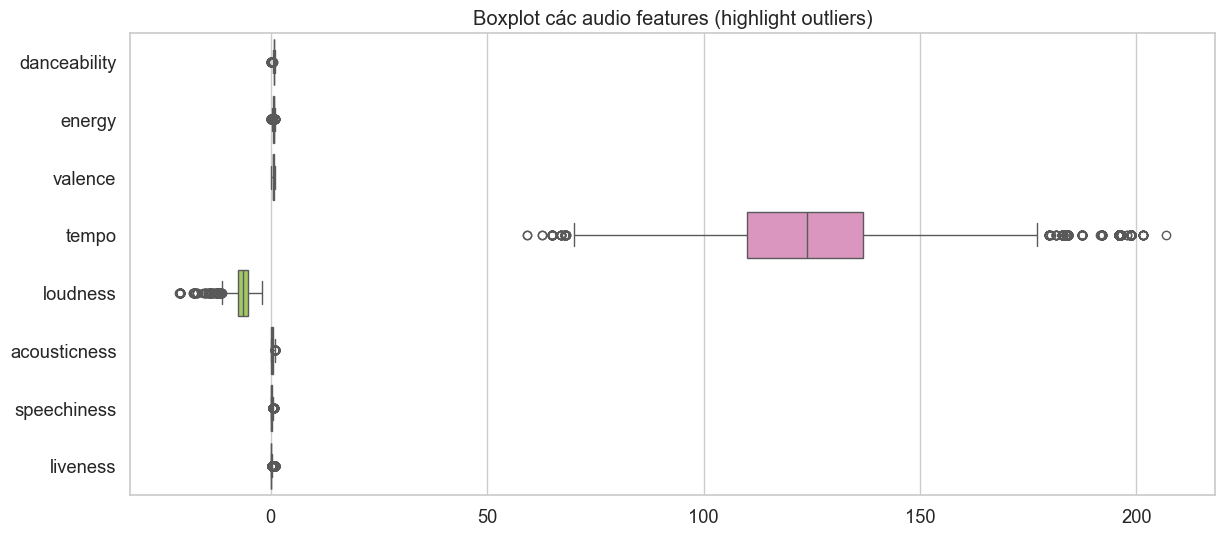

C:\Users\nhutn\AppData\Local\Temp\ipykernel_18588\1588458764.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


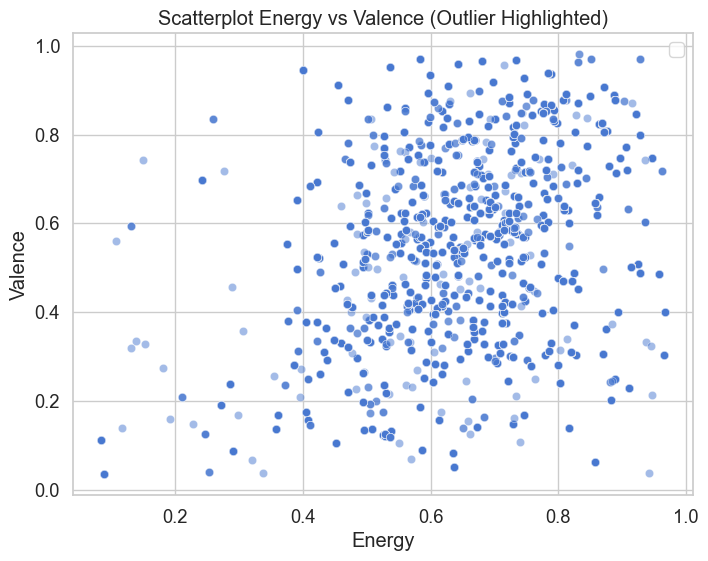

In [ ]:
import numpy as np

# Các cột feature để check
features = ['danceability','energy','valence','tempo','loudness','acousticness','speechiness','liveness']

outlier_tracks = []

for feat in features:
    Q1 = df[feat].quantile(0.25)
    Q3 = df[feat].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    outliers = df[(df[feat] < lower) | (df[feat] > upper)][['track_id','song','artist','main_genre',feat]]
    outliers['feature'] = feat
    outlier_tracks.append(outliers)

outlier_df = pd.concat(outlier_tracks).drop_duplicates()

# Hiển thị top outlier
print("Các bài hát outlier theo audio features:")
display(outlier_df.head(20))

# Visualization boxplot từng feature
plt.figure(figsize=(14,6))
sns.boxplot(data=df[features], orient="h", palette="Set2")
plt.title("Boxplot các audio features (highlight outliers)")
plt.show()

# Scatter energy vs valence để highlight mood outliers
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='energy', y='valence', alpha=0.5)
sns.scatterplot(data=outlier_df, x='energy', y='valence', color="red", label="Outliers")
plt.title("Scatterplot Energy vs Valence (Outlier Highlighted)")
plt.xlabel("Energy")
plt.ylabel("Valence")
plt.legend()
plt.show()


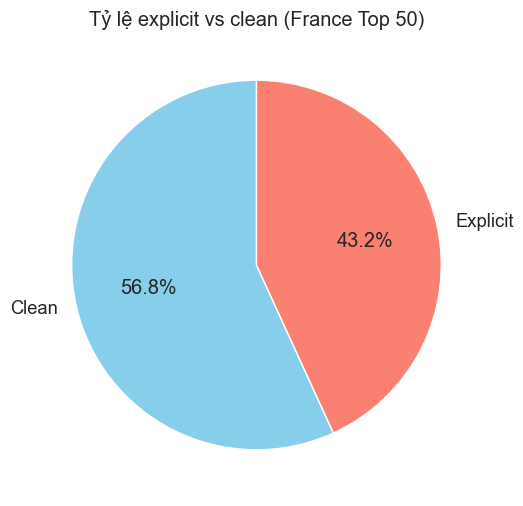

In [ ]:
# Tỷ lệ explicit vs clean
explicit_counts = df['is_explicit'].value_counts(normalize=True) * 100

plt.figure(figsize=(6,6))
plt.pie(explicit_counts, labels=['Clean','Explicit'], autopct='%1.1f%%', startangle=90, colors=["skyblue","salmon"])
plt.title("Tỷ lệ explicit vs clean (Japan Top 50)")
plt.show()


C:\Users\nhutn\AppData\Local\Temp\ipykernel_18588\55758468.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_explicit', y='energy', palette="Set2")
C:\Users\nhutn\AppData\Local\Temp\ipykernel_18588\55758468.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_explicit', y='valence', palette="Set2")


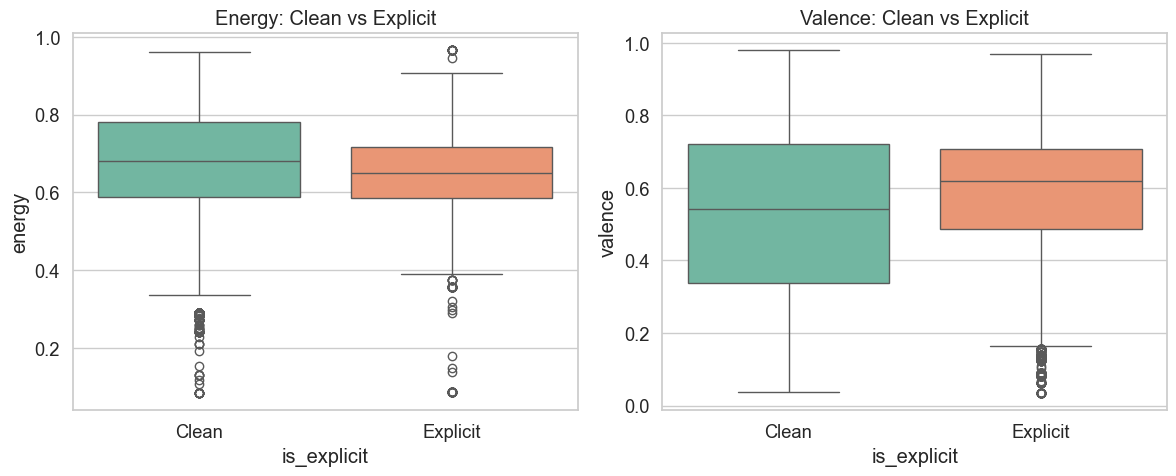

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(data=df, x='is_explicit', y='energy', palette="Set2")
plt.xticks([0,1], ["Clean","Explicit"])
plt.title("Energy: Clean vs Explicit")

plt.subplot(1,2,2)
sns.boxplot(data=df, x='is_explicit', y='valence', palette="Set2")
plt.xticks([0,1], ["Clean","Explicit"])
plt.title("Valence: Clean vs Explicit")

plt.tight_layout()
plt.show()


C:\Users\nhutn\AppData\Local\Temp\ipykernel_18588\2690721925.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=track_lifetime, x='is_explicit', y='weeks_on_chart', palette="Set1")


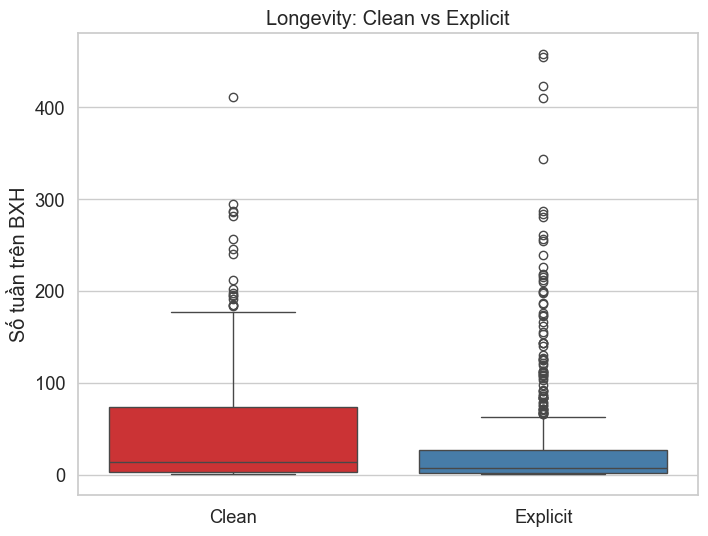

Tuổi thọ trung bình:
is_explicit
0    50.241525
1    34.558758
Name: weeks_on_chart, dtype: float64


In [ ]:
# Longevity từng track
track_lifetime = df.groupby(['track_id','is_explicit'])['date'].nunique().reset_index()
track_lifetime.columns = ['track_id','is_explicit','weeks_on_chart']

plt.figure(figsize=(8,6))
sns.boxplot(data=track_lifetime, x='is_explicit', y='weeks_on_chart', palette="Set1")
plt.xticks([0,1], ["Clean","Explicit"])
plt.title("Longevity: Clean vs Explicit")
plt.xlabel("")
plt.ylabel("Số tuần trên BXH")
plt.show()

print("Tuổi thọ trung bình:")
print(track_lifetime.groupby('is_explicit')['weeks_on_chart'].mean())


C:\Users\nhutn\AppData\Local\Temp\ipykernel_18588\4287660279.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres_explicit.values, y=top_genres_explicit.index, palette="coolwarm")


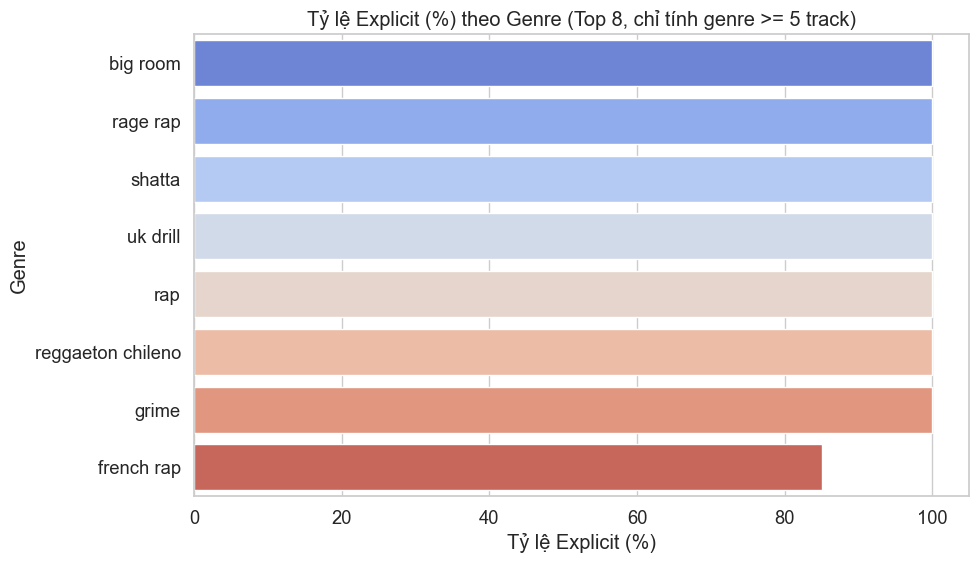

In [ ]:
genre_count = df['main_genre'].value_counts()
valid_genres = genre_count[genre_count >= 5].index

genre_explicit = df[df['main_genre'].isin(valid_genres)].groupby('main_genre')['is_explicit'].mean().sort_values(ascending=False) * 100
top_genres_explicit = genre_explicit.head(8)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres_explicit.values, y=top_genres_explicit.index, palette="coolwarm")
plt.title("Tỷ lệ Explicit (%) theo Genre (Top 8, chỉ tính genre >= 5 track)")
plt.xlabel("Tỷ lệ Explicit (%)")
plt.ylabel("Genre")
plt.show()





C:\Users\nhutn\AppData\Local\Temp\ipykernel_18588\1270854213.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_explicit', y='energy', palette="Set2", ax=axes[0])
C:\Users\nhutn\AppData\Local\Temp\ipykernel_18588\1270854213.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(["Clean","Explicit"])
C:\Users\nhutn\AppData\Local\Temp\ipykernel_18588\1270854213.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_explicit', y='valence', palette="Set2", ax=axes[1])
C:\Users\nhutn\AppData\Local\Temp\ipykernel_18588\1270854213.py:8: UserWarning: set_ticklabels()

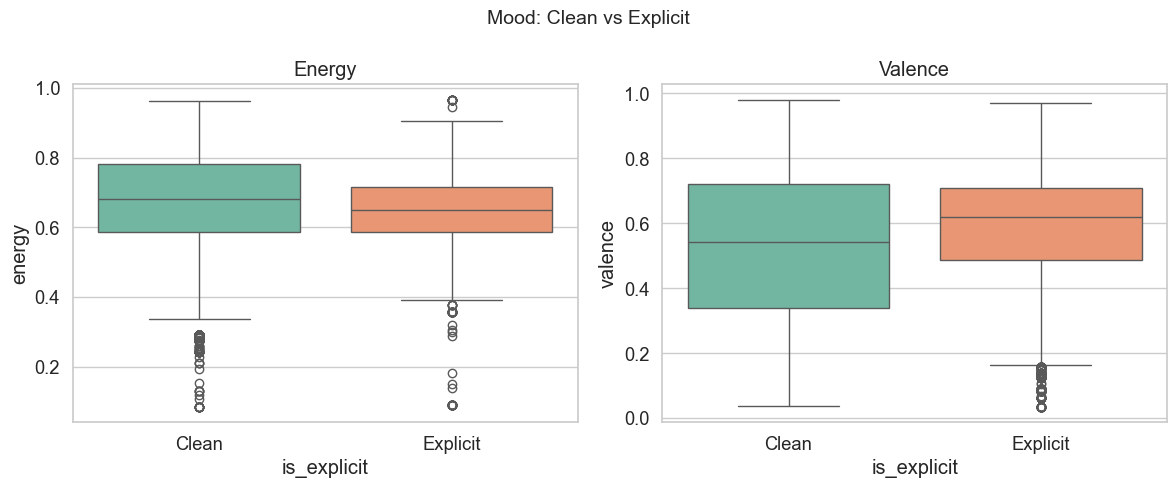

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.boxplot(data=df, x='is_explicit', y='energy', palette="Set2", ax=axes[0])
axes[0].set_xticklabels(["Clean","Explicit"])
axes[0].set_title("Energy")

sns.boxplot(data=df, x='is_explicit', y='valence', palette="Set2", ax=axes[1])
axes[1].set_xticklabels(["Clean","Explicit"])
axes[1].set_title("Valence")

fig.suptitle("Mood: Clean vs Explicit", fontsize=14)
plt.tight_layout()
plt.show()


C:\Users\nhutn\AppData\Local\Temp\ipykernel_18588\4157252350.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=track_best, x='is_explicit', y='best_rank', palette="Set3")


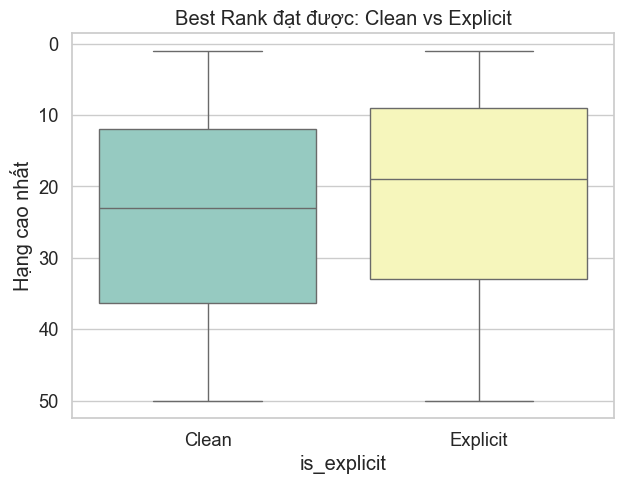

In [ ]:
track_best = df.groupby(['track_id','is_explicit'])['position'].min().reset_index()
track_best.columns = ['track_id','is_explicit','best_rank']

plt.figure(figsize=(7,5))
sns.boxplot(data=track_best, x='is_explicit', y='best_rank', palette="Set3")
plt.gca().invert_yaxis()  # rank 1 trên cùng
plt.xticks([0,1], ["Clean","Explicit"])
plt.title("Best Rank đạt được: Clean vs Explicit")
plt.ylabel("Hạng cao nhất")
plt.show()
